## IMPORTING PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
france_df = pd.read_csv("D:\MyFiles\Downloads\France.csv")
france_df

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16196\55440890.py:1: SyntaxWarning: invalid escape sequence '\M'
  france_df = pd.read_csv("D:\MyFiles\Downloads\France.csv")


,ID,Host ID,Host Name,Host Since,Host Response Rate,Host Listings Count,Host Total Listings Count,City,State,Zipcode,Country,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Rating,Cancellation Policy,Reviews per Month
0,6165738,31986651,Bernard,42120.0,100.0,1.0,1.0,Thoiry,Rhône-Alpes,1710,France,Loft,Private room,2,2.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Air Conditioning,Kitchen,...",44.0,258.0,NaN,NaN,NaN,1,0,1,1125,0,NaN,flexible,NaN
1,13908935,82489826,Enice,42559.0,100.0,1.0,1.0,Gaillard,Auvergne Rhône-Alpes,74240,France,Apartment,Entire home/apt,2,1.0,1.0,1.0,Pull-out Sofa,"TV,Internet,Wireless Internet,Kitchen,Free Par...",39.0,NaN,NaN,560.0,28.0,1,6,2,30,1,80.0,moderate,1.00
2,7713011,32492446,Vincent,42127.0,100.0,7.0,7.0,Paris,Île-de-France,75018,France,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",80.0,NaN,NaN,100.0,30.0,1,5,4,365,37,85.0,strict,1.84
3,3335054,2726446,Pascale,41084.0,NaN,1.0,1.0,Paris,Île-de-France,75018,France,Apartment,Entire home/apt,2,1.0,0.0,1.0,Pull-out Sofa,"Cable TV,Wireless Internet,Kitchen,Elevator in...",65.0,385.0,1250.0,150.0,15.0,1,0,3,1125,1,100.0,moderate,0.03
4,10066518,30432969,Lea,42095.0,95.0,2.0,2.0,Paris,Île-de-France,75018,France,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"Internet,Wireless Internet,Kitchen,Indoor fire...",41.0,340.0,NaN,NaN,15.0,1,0,2,1125,13,97.0,moderate,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56557,2610162,13368008,Réda,41719.0,60.0,1.0,1.0,Paris,Île-de-France,75007,France,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",70.0,452.0,1603.0,250.0,10.0,1,0,2,91,14,85.0,moderate,1.06
56558,13760682,8684576,H. M.,41524.0,83.0,2.0,2.0,Paris,Île-de-France,75007,France,Apartment,Entire home/apt,5,2.5,2.0,3.0,Real Bed,"Wireless Internet,Kitchen,Elevator in building...",400.0,NaN,NaN,NaN,100.0,4,50,2,15,4,100.0,strict,0.56
56559,9173969,47740911,Host,42306.0,NaN,1.0,1.0,Paris,Île-de-France,75007,France,Apartment,Shared room,1,0.5,1.0,1.0,Real Bed,"Cable TV,Carbon monoxide detector",0.0,NaN,NaN,NaN,NaN,1,0,1,1125,0,NaN,flexible,NaN
56560,13754942,35042224,Arnaud,42160.0,NaN,1.0,1.0,Paris,Île-de-France,75007,France,Apartment,Entire home/apt,3,1.0,2.0,3.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",99.0,NaN,NaN,500.0,36.0,1,0,4,500,3,100.0,strict,0.34


# PRE - PROCESSING PROCESS

In [3]:
# CHANGING DATA TYPES OF FRANCE 

france_df.columns = france_df.columns.str.lower().str.replace(" ", "_")

numeric_cols_france = ["host_response_rate", "host_listings_count", "host_total_listings_count", "accommodates", "bathrooms",
    "bedrooms", "beds", "price", "weekly_price", "monthly_price", "security_deposit", "cleaning_fee", "guests_included",
    "extra_people", "minimum_nights", "maximum_nights", "number_of_reviews", "review_scores_rating", "reviews_per_month"]

for col in numeric_cols_france:
    france_df[col] = pd.to_numeric(france_df[col], errors="coerce")

france_df["host_since"] = pd.to_numeric(france_df["host_since"], errors="coerce")

france_df["host_since"] = (pd.to_datetime("1899-12-30") + pd.to_timedelta(france_df["host_since"], unit="D"))

france_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56562 entries, 0 to 56561
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         56562 non-null  int64         
 1   host_id                    56562 non-null  int64         
 2   host_name                  56551 non-null  object        
 3   host_since                 56551 non-null  datetime64[ns]
 4   host_response_rate         37832 non-null  float64       
 5   host_listings_count        56551 non-null  float64       
 6   host_total_listings_count  56551 non-null  float64       
 7   city                       56532 non-null  object        
 8   state                      56489 non-null  object        
 9   zipcode                    55821 non-null  object        
 10  country                    56562 non-null  object        
 11  property_type              56562 non-null  object        
 12  room

In [4]:
france_df.describe()

,id,host_id,host_since,host_response_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,reviews_per_month
count,5.656200e+04,5.656200e+04,56551,37832.000000,56551.000000,56551.000000,56562.000000,56378.000000,56428.000000,56487.000000,56505.000000,16328.000000,12348.000000,31127.000000,35800.000000,56562.000000,56562.00000,56562.000000,5.656200e+04,56562.000000,41559.000000,42376.000000
mean,9.151761e+06,2.949167e+07,2014-07-09 23:56:59.716716032,91.613819,4.984333,4.984333,3.031806,1.093157,1.052563,1.678174,94.431201,502.508390,2074.539925,331.483953,35.428268,1.385382,5.49604,3.711043,1.106192e+05,14.930324,91.863038,1.169318
min,2.525000e+03,2.626000e+03,2008-08-30 00:00:00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,300.000000,69.000000,4.000000,0.000000,0.00000,1.000000,1.000000e+00,0.000000,20.000000,0.010000
25%,4.569271e+06,7.125950e+06,2013-06-27 00:00:00,95.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,55.000000,350.000000,1200.000000,200.000000,20.000000,1.000000,0.00000,1.000000,3.000000e+01,0.000000,89.000000,0.270000
50%,8.968512e+06,1.878909e+07,2014-07-30 00:00:00,100.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,75.000000,480.000000,1697.000000,300.000000,30.000000,1.000000,0.00000,2.000000,1.125000e+03,4.000000,93.000000,0.670000
75%,1.382485e+07,4.124819e+07,2015-08-17 00:00:00,100.000000,2.000000,2.000000,4.000000,1.000000,1.000000,2.000000,105.000000,619.000000,2481.250000,500.000000,48.000000,1.000000,10.00000,3.000000,1.125000e+03,15.000000,98.000000,1.530000
max,1.805586e+07,1.242594e+08,2017-04-04 00:00:00,100.000000,661.000000,661.000000,16.000000,8.000000,10.000000,16.000000,999.000000,999.000000,50000.000000,999.000000,750.000000,16.000000,753.00000,10000.000000,2.147484e+09,488.000000,100.000000,18.000000
std,5.360365e+06,2.939631e+07,NaN,20.395539,22.175313,22.175313,1.476056,0.377586,0.795633,1.030125,73.190026,190.633391,1617.255030,181.768034,27.584263,0.876342,12.81902,60.448211,1.396645e+07,29.740196,8.320069,1.377934


## MISSING VALUES

In [5]:
# iDENTIFYING NULLS
france_df.isnull().sum()

id                               0
host_id                          0
host_name                       11
host_since                      11
host_response_rate           18730
host_listings_count             11
host_total_listings_count       11
city                            30
state                           73
zipcode                        741
country                          0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                      184
bedrooms                       134
beds                            75
bed_type                         0
amenities                      428
price                           57
weekly_price                 40234
monthly_price                44214
security_deposit             25435
cleaning_fee                 20762
guests_included                  0
extra_people                     0
minimum_nights                   0
maximum_nights                   0
number_of_reviews   

In [6]:
france_df.columns.tolist()

['id',
 'host_id',
 'host_name',
 'host_since',
 'host_response_rate',
 'host_listings_count',
 'host_total_listings_count',
 'city',
 'state',
 'zipcode',
 'country',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'cancellation_policy',
 'reviews_per_month']

## REPLACING MISSING VALUES WITH 0 FOR NUMERICAL COLUMNS

In [7]:
# FILLING MISSING WITH 0 (ZERO)
cols_to_fill_zero = [
    'weekly_price',
    'host_listings_count',
    'host_total_listings_count',
    'monthly_price',
    'security_deposit',
    'cleaning_fee',
    'reviews_per_month',
    'review_scores_rating'
]

france_df[cols_to_fill_zero] = france_df[cols_to_fill_zero].fillna(0)


## MISSING VALUE TREATMENT

In [8]:
france_df['host_response_rate'] = france_df['host_response_rate'].fillna(
    france_df['host_response_rate'].median()
)

In [9]:
france_df['price'] = france_df['price'].fillna(france_df['price'].median())

## REPLACING MISSING VALUES WITH MODE FOR CATEGORICAL COLUMNS

In [10]:
mode_cols = [
    'amenities',
    'beds',
    'zipcode',
    'bedrooms',
    'bathrooms',
    'host_name',
    'host_since'
]

for col in mode_cols:
    france_df[col] = france_df[col].fillna(france_df[col].mode()[0])


In [11]:
france_df = france_df.dropna(subset=['city', 'state'])

## MISSING VALUE TREATMENT COMPLETION


In [12]:
france_df.isnull().sum()

id                           0
host_id                      0
host_name                    0
host_since                   0
host_response_rate           0
host_listings_count          0
host_total_listings_count    0
city                         0
state                        0
zipcode                      0
country                      0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
amenities                    0
price                        0
weekly_price                 0
monthly_price                0
security_deposit             0
cleaning_fee                 0
guests_included              0
extra_people                 0
minimum_nights               0
maximum_nights               0
number_of_reviews            0
review_scores_rating         0
cancellation_policy          0
reviews_per_month            0
dtype: i

## DROPPING UNWANTED COLUMNS AND MISSING VALUES MORE THAN 50% IN A COLUMN

In [13]:
france_df = france_df.drop(['weekly_price', 'monthly_price'], axis=1)

## OUTLIER IDENTIFICATION FOR FRANCE (BEFORE TREATMENT)


id: 0 outliers


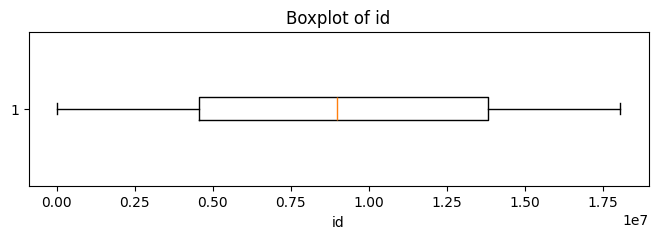


host_id: 3364 outliers


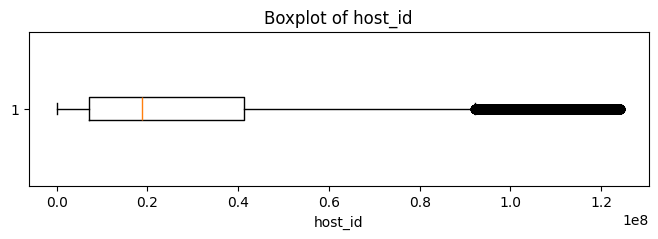


host_response_rate: 11156 outliers


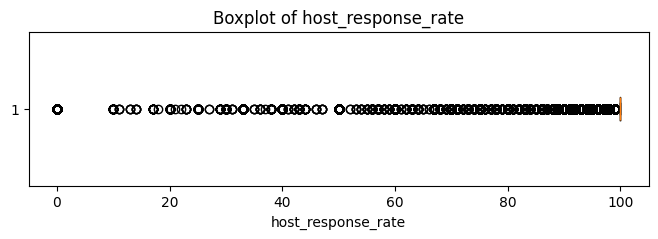


host_listings_count: 6170 outliers


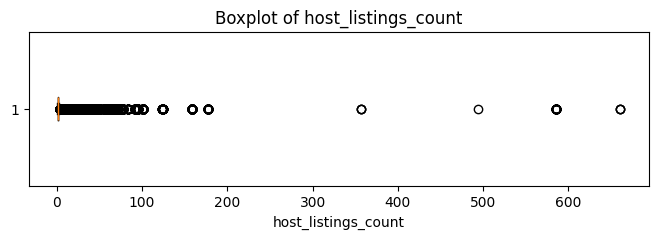


host_total_listings_count: 6170 outliers


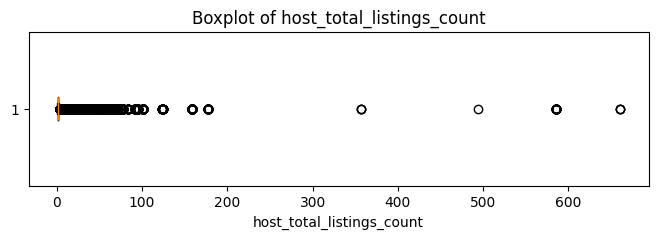


accommodates: 728 outliers


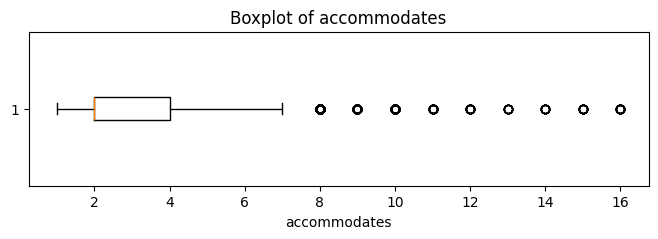


bathrooms: 6217 outliers


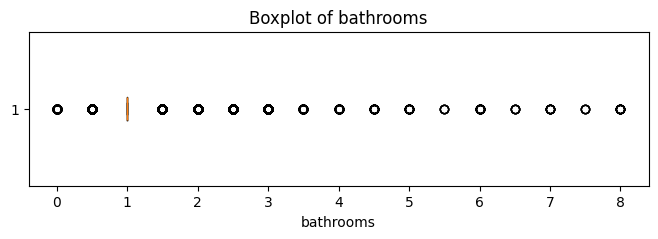


bedrooms: 22772 outliers


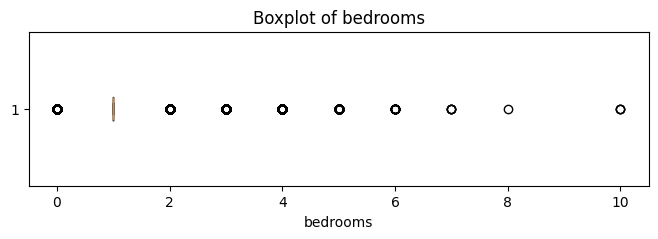


beds: 3235 outliers


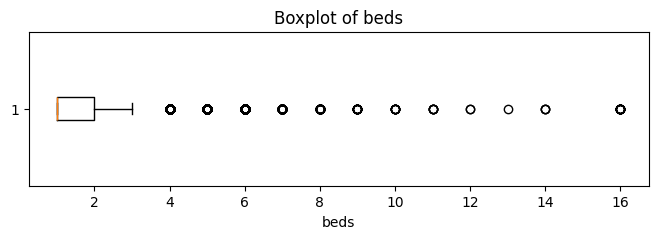


price: 4509 outliers


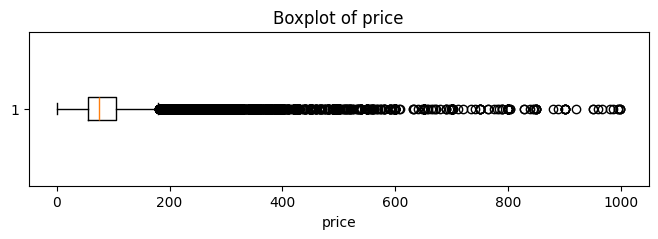


security_deposit: 1187 outliers


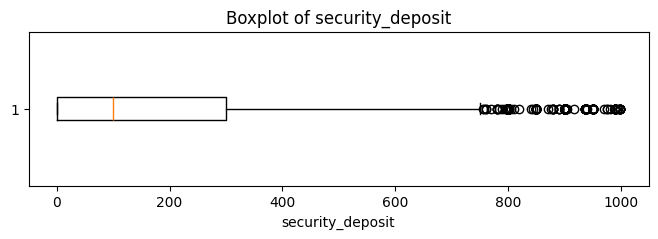


cleaning_fee: 1540 outliers


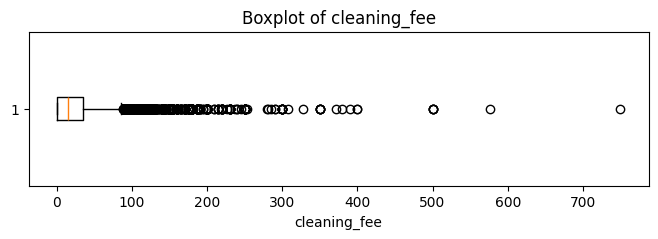


guests_included: 13928 outliers


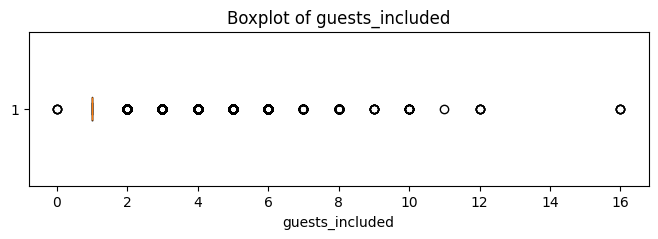


extra_people: 2723 outliers


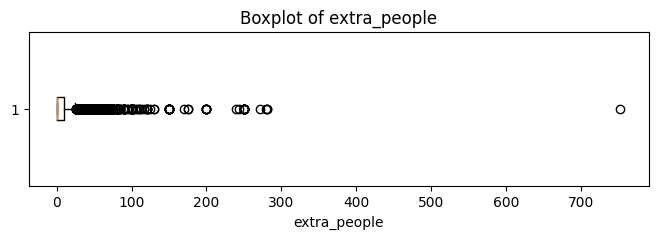


minimum_nights: 3798 outliers


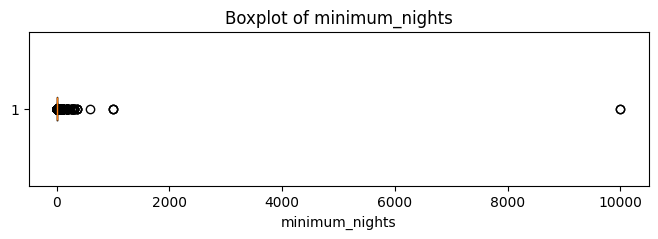


maximum_nights: 42 outliers


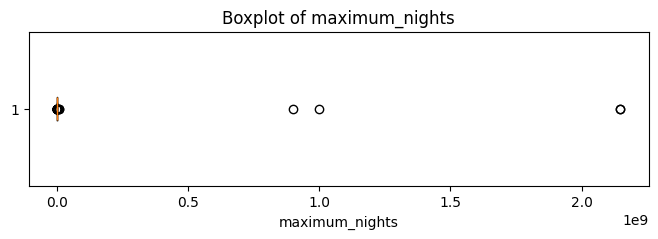


number_of_reviews: 6137 outliers


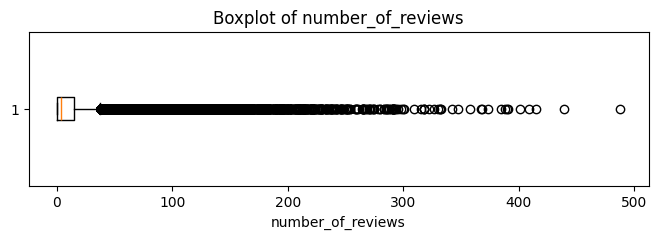


review_scores_rating: 0 outliers


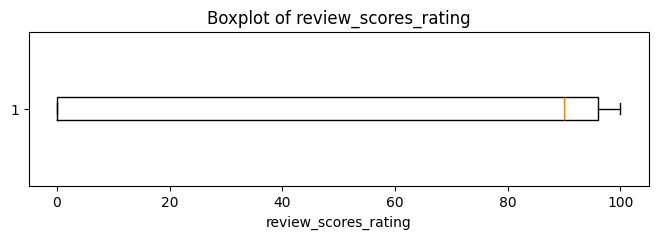


reviews_per_month: 4646 outliers


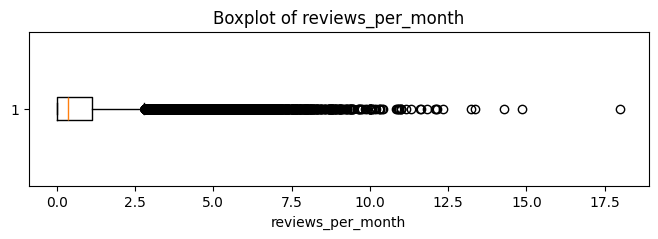

In [14]:
import matplotlib.pyplot as plt

# BEFORE TREATMENT

num_cols = france_df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    Q1 = france_df[col].quantile(0.25)
    Q3 = france_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = france_df[(france_df[col] < lower_limit) | (france_df[col] > upper_limit)]
    print(f"\n{col}: {len(outliers)} outliers")

    # ---- Boxplot ----
    plt.figure(figsize=(8, 2))
    plt.boxplot(france_df[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


In [15]:
# Columns to exclude
exclude_cols = [
    'host_id',
    'guests_included',
    'host_response_rate',
    'host_listings_count',
    'bathrooms',
    'bedrooms',
    'beds',
    'price'
]

# Select numeric columns except excluded ones
num_cols = france_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col not in exclude_cols]

# Capping outliers using mask()
for col in num_cols:
    Q1 = france_df[col].quantile(0.25)
    Q3 = france_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    france_df[col] = france_df[col].mask(france_df[col] < lower_limit, lower_limit)
    france_df[col] = france_df[col].mask(france_df[col] > upper_limit, upper_limit)


## OUTLIER TREATMENT FOR FRANCE


id: 0 outliers


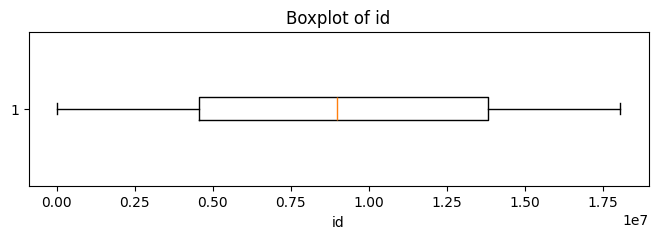


host_id: 3364 outliers


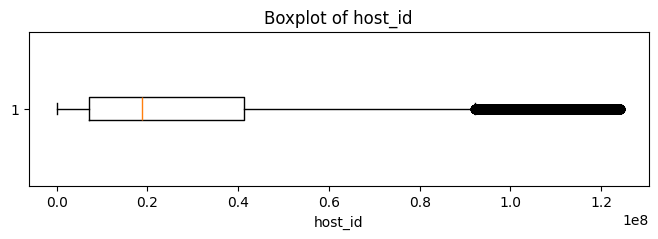


host_response_rate: 11156 outliers


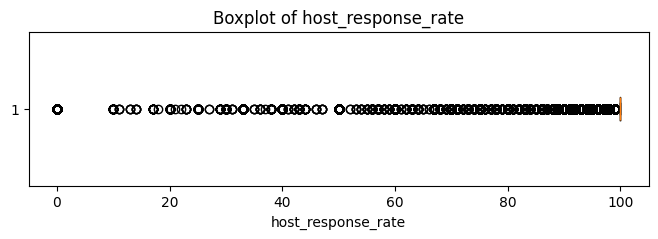


host_listings_count: 6170 outliers


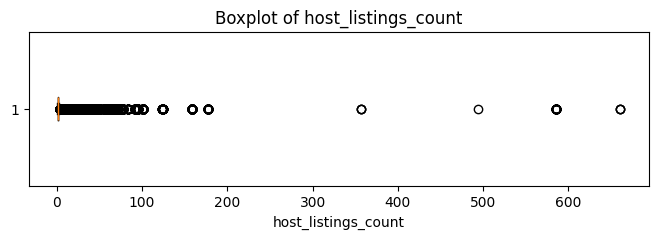


host_total_listings_count: 0 outliers


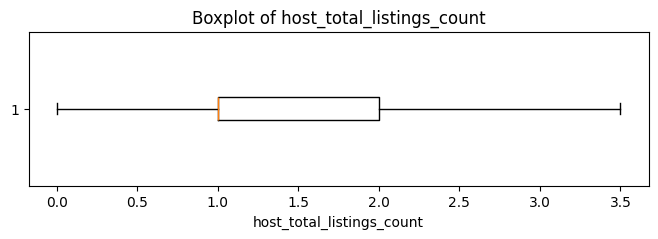


accommodates: 0 outliers


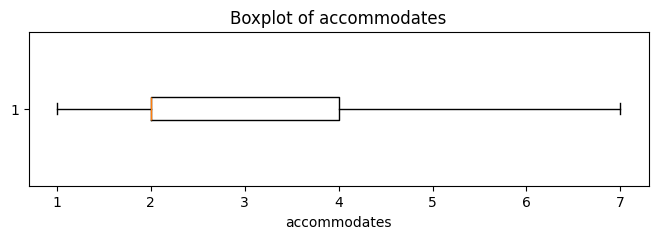


bathrooms: 6217 outliers


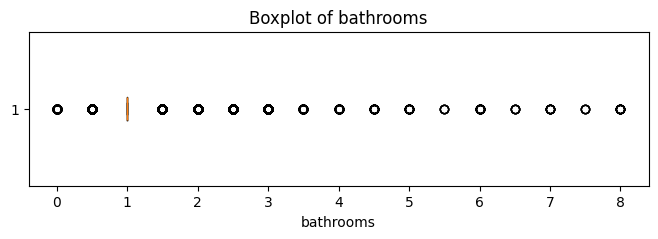


bedrooms: 22772 outliers


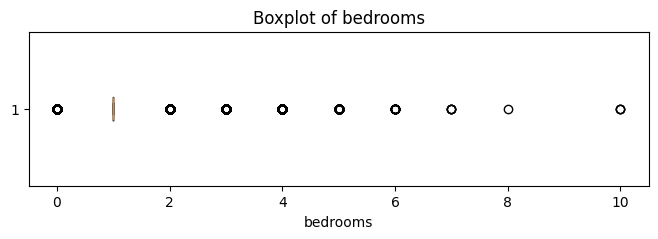


beds: 3235 outliers


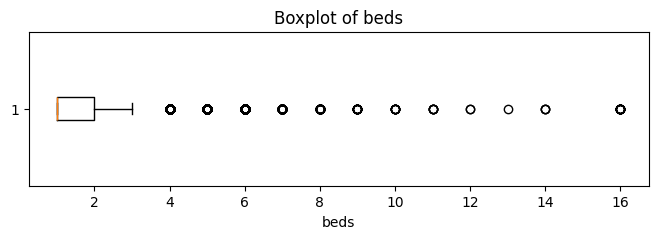


price: 4509 outliers


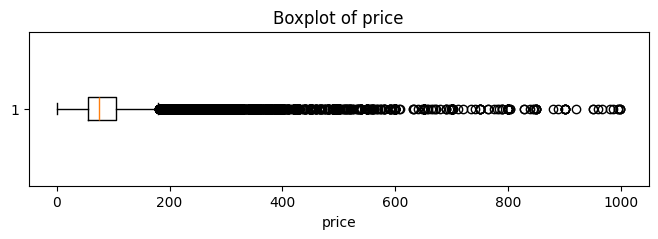


security_deposit: 0 outliers


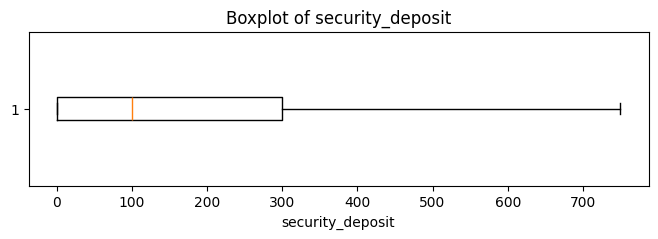


cleaning_fee: 0 outliers


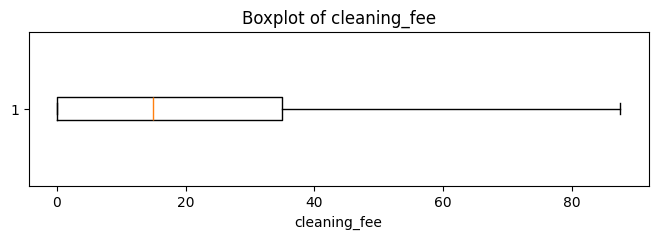


guests_included: 13928 outliers


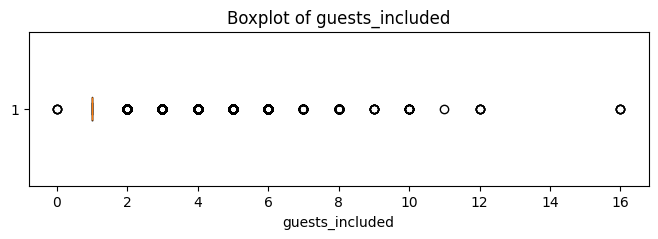


extra_people: 0 outliers


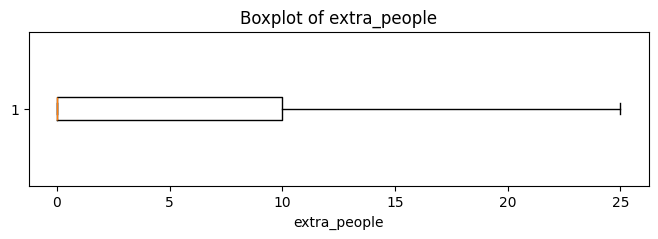


minimum_nights: 0 outliers


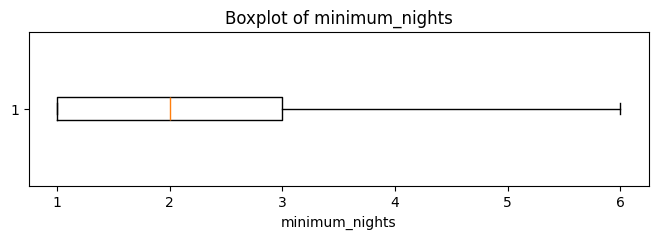


maximum_nights: 0 outliers


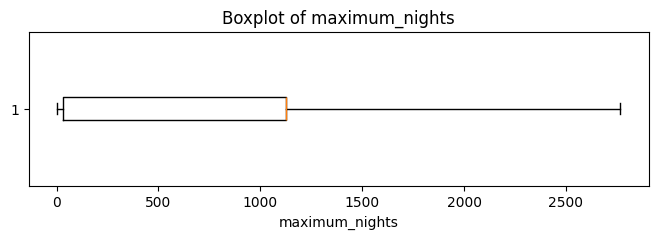


number_of_reviews: 0 outliers


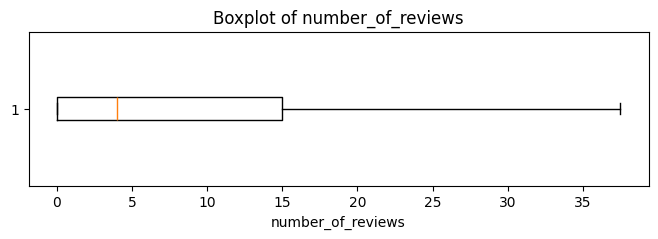


review_scores_rating: 0 outliers


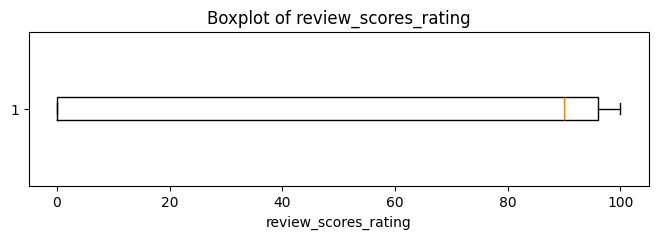


reviews_per_month: 0 outliers


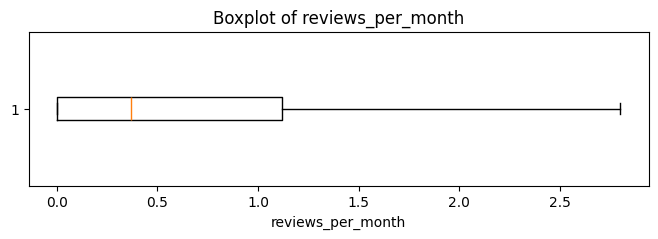

In [16]:
num_cols = france_df.select_dtypes(include=['int64', 'float64']).columns

# AFTER TREATMENT

for col in num_cols:
    Q1 = france_df[col].quantile(0.25)
    Q3 = france_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = france_df[(france_df[col] < lower_limit) | (france_df[col] > upper_limit)]
    print(f"\n{col}: {len(outliers)} outliers")

    # ---- Boxplot ----
    plt.figure(figsize=(8, 2))
    plt.boxplot(france_df[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

# ************************************************************************************

In [17]:
france_df.city.unique()

array(['Thoiry', 'Gaillard', 'Paris', 'Paris-18E-Arrondissement', 'paris',
       'Clichy', 'Paris-10E-Arrondissement', 'Pantin',
       'Paris-19E-Arrondissement', 'Le Pré-Saint-Gervais',
       'Deuil-la-Barre', 'Paris-15E-Arrondissement',
       'Issy les Moulineaux', 'Paris-12E-Arrondissement',
       'Paris-1ER-Arrondissement', 'Charenton-le-Pont',
       'Paris 6e arrondissement', 'Paris-6E-Arrondissement',
       'Paris-8E-Arrondissement', 'Levallois-Perret',
       'Paris-3E-Arrondissement', 'Paris-20E-Arrondissement',
       'Paris-11E-Arrondissement', 'Ivry-sur-Seine',
       'Paris-13E-Arrondissement', 'PARIS', 'Paris-2E-Arrondissement',
       'Collonges-sous-Salève', 'Archamps', 'Saint-Julien-en-Genevois',
       'Paris-17E-Arrondissement', 'Le Kremlin-Bicêtre',
       'Paris-4E-Arrondissement', 'Saint-Ouen',
       'Paris-14E-Arrondissement', 'Neuilly-sur-Seine',
       'Boulogne-Billancourt', 'Paris-16E-Arrondissement', 'Bagnolet',
       'Issy-les-Moulineaux', 'gaillard

In [18]:
import re

def clean_city_names(city_series):
    # 1. Convert to lowercase and strip whitespace
    cleaned_cities = city_series.astype(str).str.lower().str.strip()

    # --- Standardize 'Paris' variations ---
    # Define patterns to replace with 'paris'
    paris_patterns = [
        r'\bparis\b.*',               # Catches all variations starting with 'paris' (e.g., Paris-18E, Paris 75019)
        r'parigi',                    # Italian
        r'parís',                     # Spanish
        r'파리',                       # Korean
        r'巴黎',                       # Chinese
        r'париж',                     # Russian
        r'parijs',                    # Dutch
        r'pan\nparis',                # Catches 'Pan\nParis'
        r'pris',                      # Misspelling
        r'10th arrondissement, paris', # Specific arrondissement mention
        r"paris, île-de-france, fr",  # Geo-location detail
        r'montmartre paris',          # Neighborhood name
        r'le marais, paris, france',  # Neighborhood name
        r'rue de turenne, paris',     # Street name
        r'750\d{2}',                  # Postcodes (like 75017, 75020)
        r'arrondissement',            # Stands alone or part of a phrase
        r"paris  \( près de la  gare du nord.*", # The very long transport string
        r'parisparis',                # Double entry
        r"paris-l'hôpital"            # Specific, likely incorrect detail
    ]
    
    # Apply replacements for Paris
    for pattern in paris_patterns:
        cleaned_cities = cleaned_cities.str.replace(pattern, 'paris', regex=True)

    # Remove any lingering numbers/markers related to arrondissements after the word 'paris'
    cleaned_cities = cleaned_cities.str.replace(r'paris.(ème|eme|er|è|e|s|st|th|\d+).', 'paris', regex=True)
    
    # --- Map common variations of other towns to a single name ---
    mapping = {
        'issy les moulineaux': 'issy-les-moulineaux',
        'issy-les-moulineaux,92130': 'issy-les-moulineaux',
        'issy-les-moulineaux/paris': 'issy-les-moulineaux',
        '伊西莱穆利诺': 'issy-les-moulineaux',
        'le kremlin-bicêtre': 'le kremlin-bicetre',
        'le kremlin-bicètre': 'le kremlin-bicetre',
        'saint mandé': 'saint-mandé',
        'saint maurice': 'saint-maurice',
        'neuilly sur seine': 'neuilly-sur-seine',
        'neuilly': 'neuilly-sur-seine',
        'ivry sur seine': 'ivry-sur-seine',
        'saint denis': 'saint-denis',
        'gaillard': 'gaillard',
    }

    cleaned_cities = cleaned_cities.replace(mapping)

    # --- Final Cleanup: Remove region/department names ---
    final_cleanup_patterns = {
        'val-de-marne': np.nan,
        'seine-saint-denis': np.nan,
    }
    
    cleaned_cities = cleaned_cities.replace(final_cleanup_patterns)
    
    # 2. Return clean names in Title case for presentation, preserving hyphens
    return cleaned_cities.str.title().str.replace('-', '-').replace('Nan', np.nan)

# --- Example Usage ---
city_array = np.array(['Thoiry', 'Gaillard', 'Paris', 'Paris-18E-Arrondissement', 'paris',
       'Clichy', 'Paris-10E-Arrondissement', 'Pantin', 'Paris-19E-Arrondissement',
       'Le Pré-Saint-Gervais', 'Deuil-la-Barre', 'Paris-15E-Arrondissement',
       'Issy les Moulineaux', 'Paris-12E-Arrondissement', 'Paris-1ER-Arrondissement',
       'Charenton-le-Pont', 'Paris 6e arrondissement', 'Paris-6E-Arrondissement',
       'Paris-8E-Arrondissement', 'Levallois-Perret', 'Paris-3E-Arrondissement',
       'Paris-20E-Arrondissement', 'Paris-11E-Arrondissement', 'Ivry-sur-Seine',
       'Paris-13E-Arrondissement', 'PARIS', 'Paris-2E-Arrondissement',
       'Collonges-sous-Salève', 'Archamps', 'Saint-Julien-en-Genevois',
       'Paris-17E-Arrondissement', 'Le Kremlin-Bicêtre', 'Paris-4E-Arrondissement',
       'Saint-Ouen', 'Paris-14E-Arrondissement', 'Neuilly-sur-Seine',
       'Boulogne-Billancourt', 'Paris-16E-Arrondissement', 'Bagnolet',
       'Issy-les-Moulineaux', 'gaillard', 'Ferney-Voltaire',
       'Paris, Île-de-France, FR', 'Paris-7E-Arrondissement', 'Saint-Mandé',
       'Paris-5E-Arrondissement', 'París', 'Paris 75019', 'Gentilly', 'Montrouge',
       'Aubervilliers', 'Paris-9E-Arrondissement', 'Paris/12ème', 'Saint-Maurice',
       'Parigi', 'Paris 02', 'Vanves', 'Joinville-le-Pont', 'Fontenay-sous-Bois',
       'Nogent-sur-Marne', 'Paris-3eme-Arrondissement', '巴黎', 'PARIS 02',
       'Chamonix-Mont-Blanc', 'Seine-Saint-Denis', 'Vincennes',
       'Paris 1er Arrondissement', 'Val-de-Marne', 'Paris 11e arrondissement',
       'PARIS 3eme', 'Pris', 'NEUILLY SUR SEINE', 'Taiohae', 'Paris 8è', 'Saint-Denis',
       'Les Lilas', 'Montreuil', 'Paris 15 eme', 'Paris 03', 'Paris 2eme',
       'Ambilly', 'Etrembières', '10th arrondissement, Paris', 'vanves',
       'saint mandé', 'Prévessin-Moëns', 'Paris 4', 'Paris 4eme', 'Paris 17ème',
       'Issy-les-Moulineaux/Paris', 'Paris 10', 'Ivry sur Seine', 'PARIS 05',
       "Paris  ( près de la  Gare du Nord RER B: direct d'Orly et de Roissy,RER D à une statio du Chatelêt, Métro:lignes 4,5,7, Bus: 38, 42, 43,46,65, Métro et bus autres que Gare du Nord: La Chapelle ligne 2 , Marx Dormoy ligne 12;",
       'Paris 18', 'Suresnes', 'Neuilly', 'ParisParis', 'Paris 19eme', 'Paris 16',
       'Ville-la-Grand', 'ISSY LES MOULINEAUX,92130', '75020 Paris', '파리',
       'Paris 75017', 'Paris 4e arrondissement', 'Malakoff',
       'Rue de Turenne, Paris', 'Paris 07', 'Париж', 'Paris 18e', 'Moillesulaz',
       'Pan\nParis', 'Veigy-Foncenex', 'Viry', 'Neuilly Sur Seine', 'Saint-Cloud',
       '75019 Paris, Île-de-France, FR', 'Paris 09', 'Neuilly sur Seine',
       'Paris 01', 'Montmartre Paris', 'Paris 12ème', "Paris-l'Hôpital",
       '伊西莱穆利诺', 'PARIS 11', 'Paris, 4th arrondissement',
       'Issy les moulineaux', 'Arrondissement', 'Parijs', 'Le Kremlin-Bicètre',
       'Paris 75005', 'Paris 06', 'SAINT MAURICE', 'Le Marais, Paris, France',
       'parisl', '75016', 'Aigueblanche'])


# Create a pandas Series from your array
city_series = pd.Series(city_array)

# Apply the cleaning function
cleaned_cities_series = clean_city_names(city_series)
cleaned_cities_array = cleaned_cities_series.dropna().unique()

# Apply the function to the column and save the result back into the same column
france_df["city"] = clean_city_names(france_df["city"])

In [19]:
import pandas as pd
import numpy as np
import re

def clean_city_names(city_series):
    # 1. Convert to lowercase and strip whitespace
    cleaned_cities = city_series.astype(str).str.lower().str.strip()

    # --- Standardize 'Paris' variations ---
    # Define patterns to replace with 'paris'
    paris_patterns = [
        r'\bparis\b.*',               # Catches all variations starting with 'paris' (e.g., Paris-18E, Paris 75019)
        r'parigi',                    # Italian
        r'parís',                     # Spanish
        r'파리',                       # Korean
        r'巴黎',                       # Chinese
        r'париж',                     # Russian
        r'parijs',                    # Dutch
        r'pan\nparis',                # Catches 'Pan\nParis'
        r'pris',                      # Misspelling
        r'10th arrondissement, paris', # Specific arrondissement mention
        r"paris, île-de-france, fr",  # Geo-location detail
        r'montmartre paris',          # Neighborhood name
        r'le marais, paris, france',  # Neighborhood name
        r'rue de turenne, paris',     # Street name
        r'750\d{2}',                  # Postcodes (like 75017, 75020)
        r'arrondissement',            # Stands alone or part of a phrase
        r"paris  \( près de la  gare du nord.*", # The very long transport string
        r'parisparis',                # Double entry
        r"paris-l'hôpital"            # Specific, likely incorrect detail
    ]
    
    # Apply replacements for Paris
    for pattern in paris_patterns:
        cleaned_cities = cleaned_cities.str.replace(pattern, 'paris', regex=True)

    # Remove any lingering numbers/markers related to arrondissements after the word 'paris'
    cleaned_cities = cleaned_cities.str.replace(r'paris.(ème|eme|er|è|e|s|st|th|\d+).', 'paris', regex=True)
    
    # --- Map common variations of other towns to a single name ---
    mapping = {
        'issy les moulineaux': 'issy-les-moulineaux',
        'issy-les-moulineaux,92130': 'issy-les-moulineaux',
        'issy-les-moulineaux/paris': 'issy-les-moulineaux',
        '伊西莱穆利诺': 'issy-les-moulineaux',
        'le kremlin-bicêtre': 'le kremlin-bicetre',
        'le kremlin-bicètre': 'le kremlin-bicetre',
        'saint mandé': 'saint-mandé',
        'saint maurice': 'saint-maurice',
        'neuilly sur seine': 'neuilly-sur-seine',
        'neuilly': 'neuilly-sur-seine',
        'ivry sur seine': 'ivry-sur-seine',
        'saint denis': 'saint-denis',
        'gaillard': 'gaillard',
    }

    cleaned_cities = cleaned_cities.replace(mapping)

    # --- Final Cleanup: Remove region/department names ---
    final_cleanup_patterns = {
        'val-de-marne': np.nan,
        'seine-saint-denis': np.nan,
    }
    
    cleaned_cities = cleaned_cities.replace(final_cleanup_patterns)
    
    # 2. Return clean names in Title case for presentation, preserving hyphens
    return cleaned_cities.str.title().str.replace('-', '-').replace('Nan', np.nan)

# --- Example Usage ---
city_array = np.array(['Thoiry', 'Gaillard', 'Paris', 'Paris-18E-Arrondissement', 'paris',
       'Clichy', 'Paris-10E-Arrondissement', 'Pantin', 'Paris-19E-Arrondissement',
       'Le Pré-Saint-Gervais', 'Deuil-la-Barre', 'Paris-15E-Arrondissement',
       'Issy les Moulineaux', 'Paris-12E-Arrondissement', 'Paris-1ER-Arrondissement',
       'Charenton-le-Pont', 'Paris 6e arrondissement', 'Paris-6E-Arrondissement',
       'Paris-8E-Arrondissement', 'Levallois-Perret', 'Paris-3E-Arrondissement',
       'Paris-20E-Arrondissement', 'Paris-11E-Arrondissement', 'Ivry-sur-Seine',
       'Paris-13E-Arrondissement', 'PARIS', 'Paris-2E-Arrondissement',
       'Collonges-sous-Salève', 'Archamps', 'Saint-Julien-en-Genevois',
       'Paris-17E-Arrondissement', 'Le Kremlin-Bicêtre', 'Paris-4E-Arrondissement',
       'Saint-Ouen', 'Paris-14E-Arrondissement', 'Neuilly-sur-Seine',
       'Boulogne-Billancourt', 'Paris-16E-Arrondissement', 'Bagnolet',
       'Issy-les-Moulineaux', 'gaillard', 'Ferney-Voltaire',
       'Paris, Île-de-France, FR', 'Paris-7E-Arrondissement', 'Saint-Mandé',
       'Paris-5E-Arrondissement', 'París', 'Paris 75019', 'Gentilly', 'Montrouge',
       'Aubervilliers', 'Paris-9E-Arrondissement', 'Paris/12ème', 'Saint-Maurice',
       'Parigi', 'Paris 02', 'Vanves', 'Joinville-le-Pont', 'Fontenay-sous-Bois',
       'Nogent-sur-Marne', 'Paris-3eme-Arrondissement', '巴黎', 'PARIS 02',
       'Chamonix-Mont-Blanc', 'Seine-Saint-Denis', 'Vincennes',
       'Paris 1er Arrondissement', 'Val-de-Marne', 'Paris 11e arrondissement',
       'PARIS 3eme', 'Pris', 'NEUILLY SUR SEINE', 'Taiohae', 'Paris 8è', 'Saint-Denis',
       'Les Lilas', 'Montreuil', 'Paris 15 eme', 'Paris 03', 'Paris 2eme',
       'Ambilly', 'Etrembières', '10th arrondissement, Paris', 'vanves',
       'saint mandé', 'Prévessin-Moëns', 'Paris 4', 'Paris 4eme', 'Paris 17ème',
       'Issy-les-Moulineaux/Paris', 'Paris 10', 'Ivry sur Seine', 'PARIS 05',
       "Paris  ( près de la  Gare du Nord RER B: direct d'Orly et de Roissy,RER D à une statio du Chatelêt, Métro:lignes 4,5,7, Bus: 38, 42, 43,46,65, Métro et bus autres que Gare du Nord: La Chapelle ligne 2 , Marx Dormoy ligne 12;",
       'Paris 18', 'Suresnes', 'Neuilly', 'ParisParis', 'Paris 19eme', 'Paris 16',
       'Ville-la-Grand', 'ISSY LES MOULINEAUX,92130', '75020 Paris', '파리',
       'Paris 75017', 'Paris 4e arrondissement', 'Malakoff',
       'Rue de Turenne, Paris', 'Paris 07', 'Париж', 'Paris 18e', 'Moillesulaz',
       'Pan\nParis', 'Veigy-Foncenex', 'Viry', 'Neuilly Sur Seine', 'Saint-Cloud',
       '75019 Paris, Île-de-France, FR', 'Paris 09', 'Neuilly sur Seine',
       'Paris 01', 'Montmartre Paris', 'Paris 12ème', "Paris-l'Hôpital",
       '伊西莱穆利诺', 'PARIS 11', 'Paris, 4th arrondissement',
       'Issy les moulineaux', 'Arrondissement', 'Parijs', 'Le Kremlin-Bicètre',
       'Paris 75005', 'Paris 06', 'SAINT MAURICE', 'Le Marais, Paris, France',
       'parisl', '75016', 'Aigueblanche'])


# Create a pandas Series from your array
city_series = pd.Series(city_array)

# Apply the cleaning function
cleaned_cities_series = clean_city_names(city_series)
cleaned_cities_array = cleaned_cities_series.dropna().unique()

# Apply the function to the column and save the result back into the same column
france_df["city"] = clean_city_names(france_df["city"])

In [20]:
france_df["city"] = france_df["city"].replace(
    {"Issy Les Moulineaux,92130": "Issy Les Moulineaux"}
)

In [21]:
france_df.city.unique()

array(['Thoiry', 'Gaillard', 'Paris', 'Clichy', 'Pantin',
       'Le Pré-Saint-Gervais', 'Deuil-La-Barre', 'Issy-Les-Moulineaux',
       'Charenton-Le-Pont', 'Levallois-Perret', 'Ivry-Sur-Seine',
       'Collonges-Sous-Salève', 'Archamps', 'Saint-Julien-En-Genevois',
       'Le Kremlin-Bicetre', 'Saint-Ouen', 'Neuilly-Sur-Seine',
       'Boulogne-Billancourt', 'Bagnolet', 'Ferney-Voltaire',
       'Saint-Mandé', 'Gentilly', 'Montrouge', 'Aubervilliers',
       'Saint-Maurice', 'Vanves', 'Joinville-Le-Pont',
       'Fontenay-Sous-Bois', 'Nogent-Sur-Marne', 'Chamonix-Mont-Blanc',
       nan, 'Vincennes', 'Taiohae', 'Saint-Denis', 'Les Lilas',
       'Montreuil', 'Ambilly', 'Etrembières', 'Prévessin-Moëns',
       'Suresnes', 'Ville-La-Grand', 'Issy Les Moulineaux', 'Malakoff',
       'Moillesulaz', 'Veigy-Foncenex', 'Viry', 'Saint-Cloud',
       'Le Marais, Paris', 'Parisl', 'Aigueblanche'], dtype=object)

In [22]:
france_df.city.dropna(inplace = True)

In [23]:
city_to_state_map = {

    # --- ÎLE-DE-FRANCE ---
    'Paris': 'Île-de-France',
    'Clichy': 'Île-de-France',
    'Pantin': 'Île-de-France',
    'Le Pré-Saint-Gervais': 'Île-de-France',
    'Deuil-La-Barre': 'Île-de-France',
    'Issy-Les-Moulineaux': 'Île-de-France',
    'Issy Les Moulineaux': 'Île-de-France',
    'Charenton-Le-Pont': 'Île-de-France',
    'Levallois-Perret': 'Île-de-France',
    'Ivry-Sur-Seine': 'Île-de-France',
    'Le Kremlin-Bicetre': 'Île-de-France',
    'Saint-Ouen': 'Île-de-France',
    'Neuilly-Sur-Seine': 'Île-de-France',
    'Boulogne-Billancourt': 'Île-de-France',
    'Bagnolet': 'Île-de-France',
    'Saint-Mandé': 'Île-de-France',
    'Gentilly': 'Île-de-France',
    'Montrouge': 'Île-de-France',
    'Aubervilliers': 'Île-de-France',
    'Saint-Maurice': 'Île-de-France',
    'Vanves': 'Île-de-France',
    'Joinville-Le-Pont': 'Île-de-France',
    'Fontenay-Sous-Bois': 'Île-de-France',
    'Nogent-Sur-Marne': 'Île-de-France',
    'Vincennes': 'Île-de-France',
    'Saint-Denis': 'Île-de-France',
    'Les Lilas': 'Île-de-France',
    'Montreuil': 'Île-de-France',
    'Suresnes': 'Île-de-France',
    'Malakoff': 'Île-de-France',
    'Saint-Cloud': 'Île-de-France',
    'Le Marais, Paris': 'Île-de-France',
    'Parisl': 'Île-de-France',  # misspelling of Paris


    # --- AUVERGNE-RHÔNE-ALPES ---
    'Gaillard': 'Auvergne-Rhône-Alpes',
    'Collonges-Sous-Salève': 'Auvergne-Rhône-Alpes',
    'Archamps': 'Auvergne-Rhône-Alpes',
    'Saint-Julien-En-Genevois': 'Auvergne-Rhône-Alpes',
    'Ferney-Voltaire': 'Auvergne-Rhône-Alpes',
    'Ambilly': 'Auvergne-Rhône-Alpes',
    'Etrembières': 'Auvergne-Rhône-Alpes',
    'Prévessin-Moëns': 'Auvergne-Rhône-Alpes',
    'Ville-La-Grand': 'Auvergne-Rhône-Alpes',
    'Moillesulaz': 'Auvergne-Rhône-Alpes',
    'Veigy-Foncenex': 'Auvergne-Rhône-Alpes',
    'Viry': 'Auvergne-Rhône-Alpes',
    'Chamonix-Mont-Blanc': 'Auvergne-Rhône-Alpes',
    'Aigueblanche': 'Auvergne-Rhône-Alpes',
    'Thoiry': 'Auvergne-Rhône-Alpes',


    # --- FRENCH POLYNESIA ---
    'Taiohae': 'French Polynesia',  # IMPORTANT SPECIAL CASE


    # If any city doesn't map, we leave state as NaN
}

france_df["state"] = france_df["city"].replace(city_to_state_map)

In [24]:
france_df["state"].unique()

array(['Auvergne-Rhône-Alpes', 'Île-de-France', nan, 'French Polynesia'],
      dtype=object)

In [25]:
france_df.state.dropna(inplace = True)

In [26]:
france_df.cancellation_policy.value_counts()

cancellation_policy
flexible           20645
strict             19567
moderate           16232
super_strict_60       11
super_strict_30        7
Name: count, dtype: int64

In [27]:
for col in france_df.columns:
    print(f"\nColumn: {col}")
    print(france_df[col].unique())
    print("-" * 50)


Column: id
[ 6165738 13908935  7713011 ...  9173969 13754942  8642835]
--------------------------------------------------

Column: host_id
[31986651 82489826 32492446 ... 47740911 35042224 12437830]
--------------------------------------------------

Column: host_name
['Bernard' 'Enice' 'Vincent' ... 'Rouchon' 'Piero' 'Host']
--------------------------------------------------

Column: host_since
<DatetimeArray>
['2015-04-26 00:00:00', '2016-07-08 00:00:00', '2015-05-03 00:00:00',
 '2012-06-24 00:00:00', '2015-04-01 00:00:00', '2016-03-12 00:00:00',
 '2015-08-28 00:00:00', '2015-07-17 00:00:00', '2014-04-07 00:00:00',
 '2015-07-05 00:00:00',
 ...
 '2010-04-18 00:00:00', '2010-10-28 00:00:00', '2009-10-26 00:00:00',
 '2010-06-30 00:00:00', '2011-04-10 00:00:00', '2010-06-22 00:00:00',
 '2010-09-12 00:00:00', '2010-09-14 00:00:00', '2010-11-07 00:00:00',
 '2010-01-14 00:00:00']
Length: 2572, dtype: datetime64[ns]
--------------------------------------------------

Column: host_response_r

## ADDING DATE COLUMNS 

In [28]:
france_df["host_since"] = pd.to_datetime(france_df["host_since"], errors="coerce")

In [29]:
# Extract year
france_df["host_year"] = france_df["host_since"].dt.year

# Extract month number
france_df["host_month"] = france_df["host_since"].dt.month

# Extract month name
france_df["host_month_name"] = france_df["host_since"].dt.month_name()

# Extract week number
france_df["host_week"] = france_df["host_since"].dt.isocalendar().week

# Extract quarter (1,2,3,4)
france_df["host_quarter"] = france_df["host_since"].dt.quarter

# Extract day of month
france_df["host_day"] = france_df["host_since"].dt.day

# Extract day name (Monday, Tuesday etc.)
france_df["host_day_name"] = france_df["host_since"].dt.day_name()


In [30]:
# Export cleaned France dataset
france_df.to_csv("france_cleaned.csv", index=False)


# FRANCE ANALYSIS 

## 1️⃣ LISTING AND HOST PERFORMANCE ANALYSIS 

In [31]:
france_df.host_total_listings_count = france_df.host_total_listings_count.round(0)

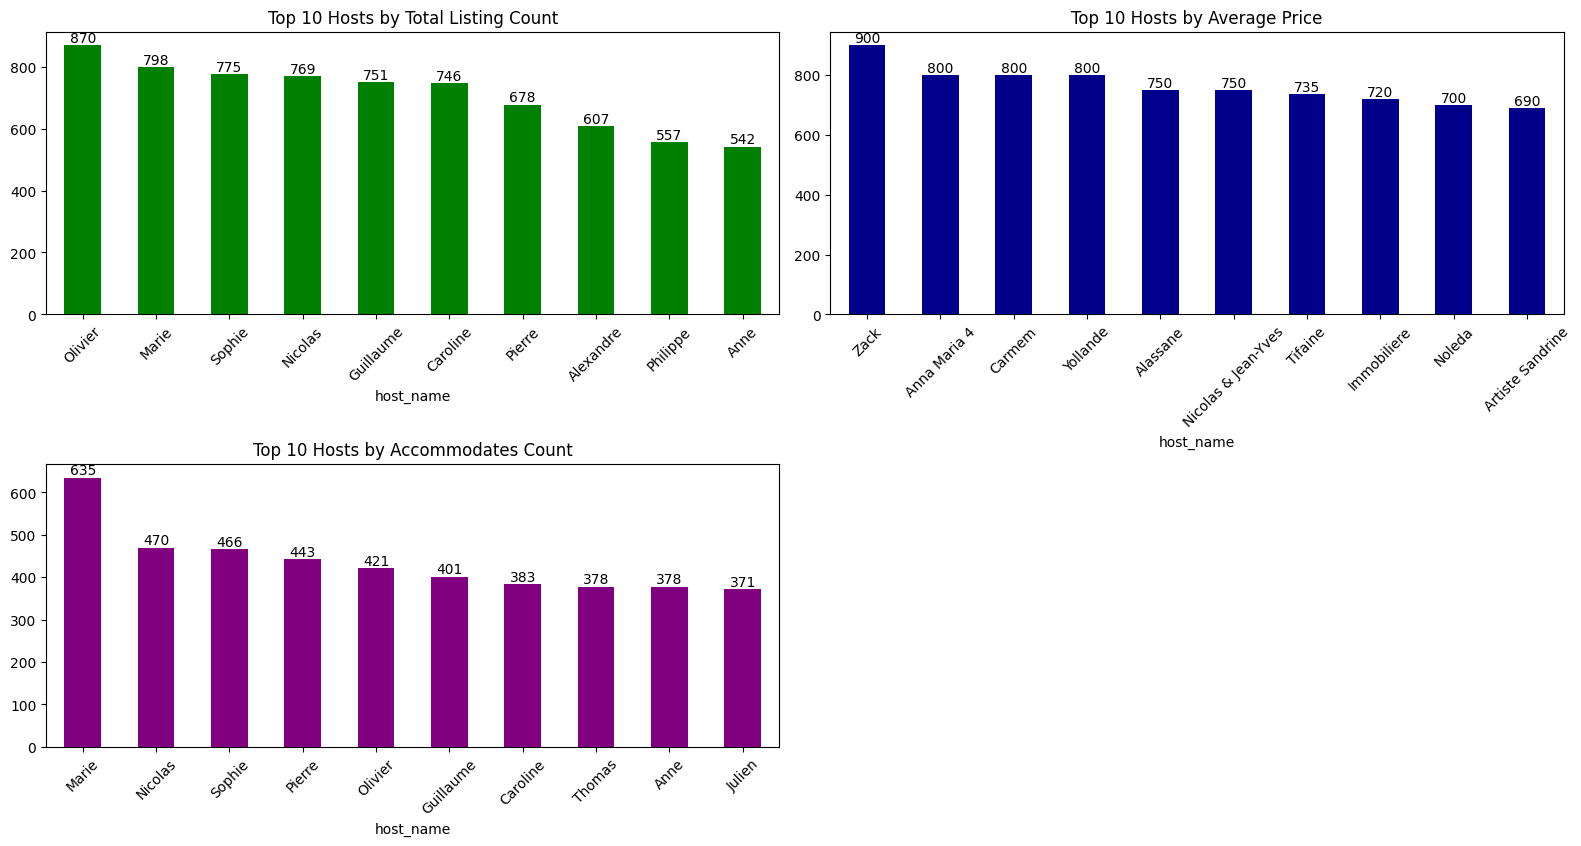

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))

# I. Top 10 Hosts by Total Listing Count
plt.subplot(3,2,1)
plot1 = france_df.groupby("host_name")["host_total_listings_count"].sum().sort_values(ascending=False).head(10).plot(kind="bar", color="green")
plot1.bar_label(plot1.containers[0])
plt.title("Top 10 Hosts by Total Listing Count")
plt.xticks(rotation=45)


# II. Top 10 Hosts by Average Price
plt.subplot(3,2,2)
plot2 = france_df.groupby("host_name")["price"].mean().sort_values(ascending=False).head(10).plot(kind="bar", color="darkblue")
plot2.bar_label(plot2.containers[0])
plt.title("Top 10 Hosts by Average Price")
plt.xticks(rotation=45)


# III. Top 10 Hosts by Accommodates Count
plt.subplot(3,2,3)
plot3 = france_df.groupby("host_name")["accommodates"].count().sort_values(ascending=False).head(10).plot(kind="bar", color="purple")
plot3.bar_label(plot3.containers[0])
plt.title("Top 10 Hosts by Accommodates Count")
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


# Geospatial and Location Analysis 

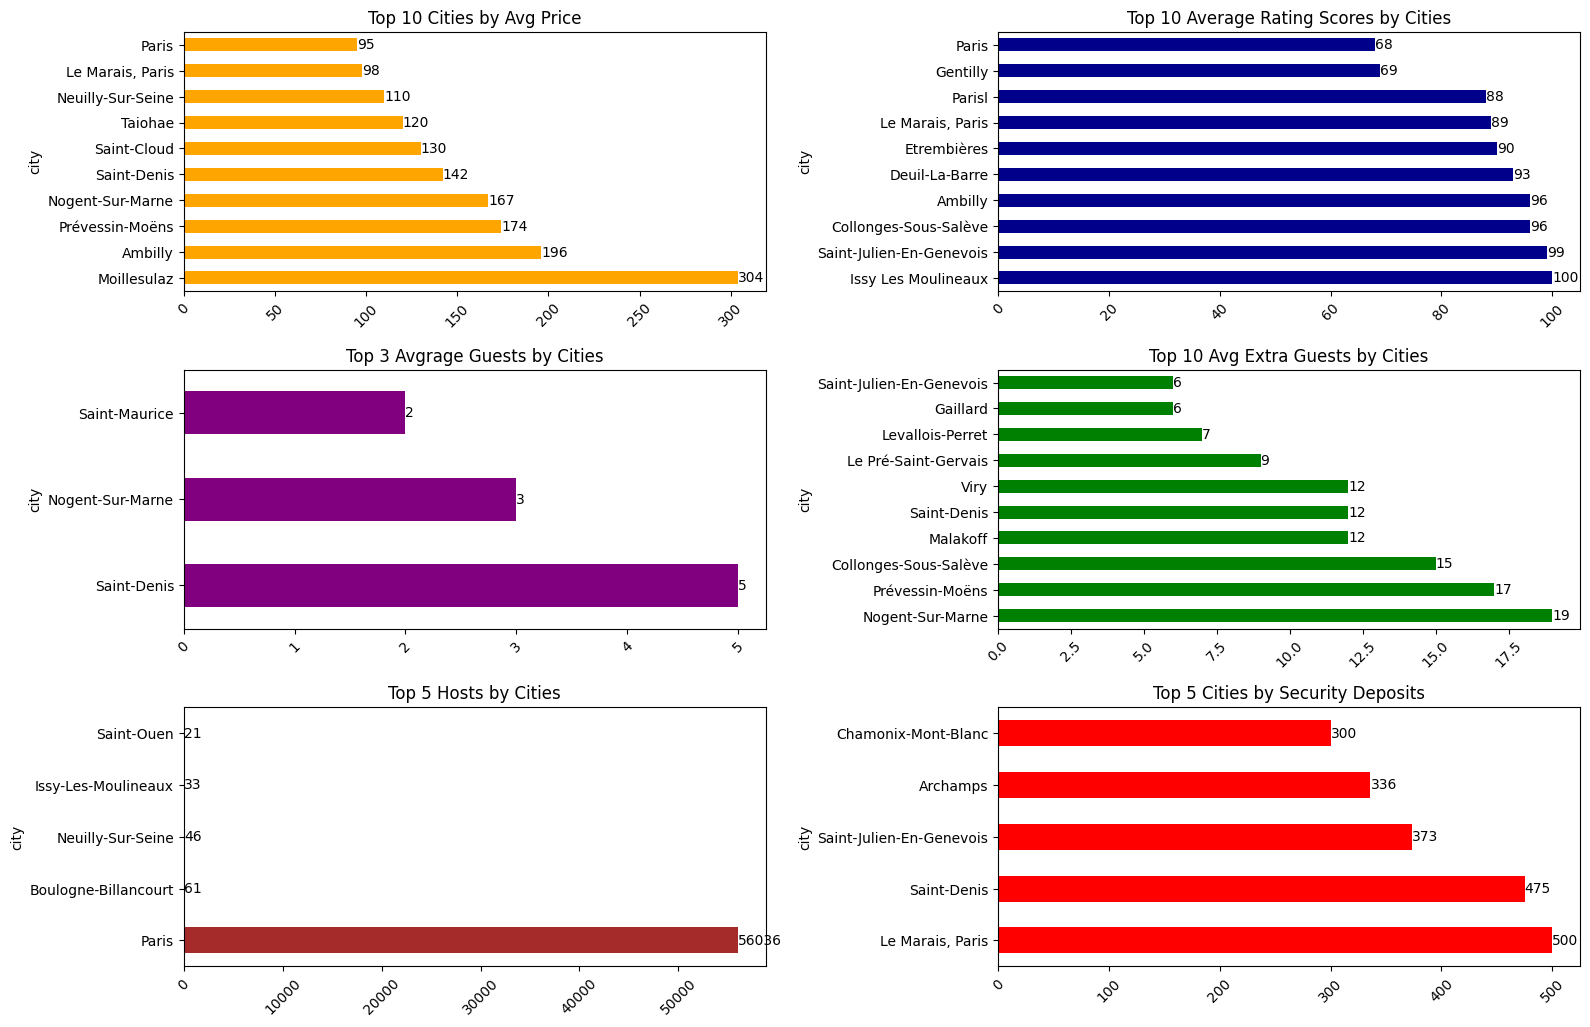

In [33]:
plt.figure(figsize=(16,20))

# I. Top 10 Cities by Avg Price
plt.subplot(6,2,1)
plot4 = france_df.groupby("city")["price"].mean().round(0).sort_values(ascending=False).head(10).plot(kind="barh", color="orange")
plot4.bar_label(plot4.containers[0])
plt.title("Top 10 Cities by Avg Price")
plt.xticks(rotation=45)


# II. Top 10 Average Rating Scores by Cities
plt.subplot(6,2,2)
plot5 = france_df.groupby("city")["review_scores_rating"].mean().round(0).sort_values(ascending=False).head(10).plot(kind="barh", color="darkblue")
plot5.bar_label(plot5.containers[0])
plt.title("Top 10 Average Rating Scores by Cities")
plt.xticks(rotation=45)


# III. Top 3 Avgrage Guests by Cities
plt.subplot(6,2,3)
plot6 = france_df.groupby("city")["guests_included"].mean().round(0).sort_values(ascending=False).head(3).plot(kind="barh", color="purple")
plot6.bar_label(plot6.containers[0])
plt.title("Top 3 Avgrage Guests by Cities")
plt.xticks(rotation=45)

# IV. Top 10 Avg Extra Guests by Cities
plt.subplot(6,2,4)
plot6 = france_df.groupby("city")["extra_people"].mean().round(0).sort_values(ascending=False).head(10).plot(kind="barh", color="green")
plot6.bar_label(plot6.containers[0])
plt.title("Top 10 Avg Extra Guests by Cities")
plt.xticks(rotation=45)

# V. Top 5 Cities with most Hosts
plt.subplot(6,2,5)
plot7 = france_df.groupby("city")["host_id"].count().round(0).sort_values(ascending=False).head(5).plot(kind="barh", color="brown")
plot7.bar_label(plot7.containers[0])
plt.title("Top 5 Hosts by Cities")
plt.xticks(rotation=45) 

# V. Top 5 Cities by Security Deposits
plt.subplot(6,2,6)
plot8 = france_df.groupby("city")["security_deposit"].mean().round(0).sort_values(ascending=False).head(5).plot(kind="barh", color="red")
plot8.bar_label(plot8.containers[0])
plt.title("Top 5 Cities by Security Deposits")
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

# CUSTOMER EXPERIENCE AND SATISFACTION

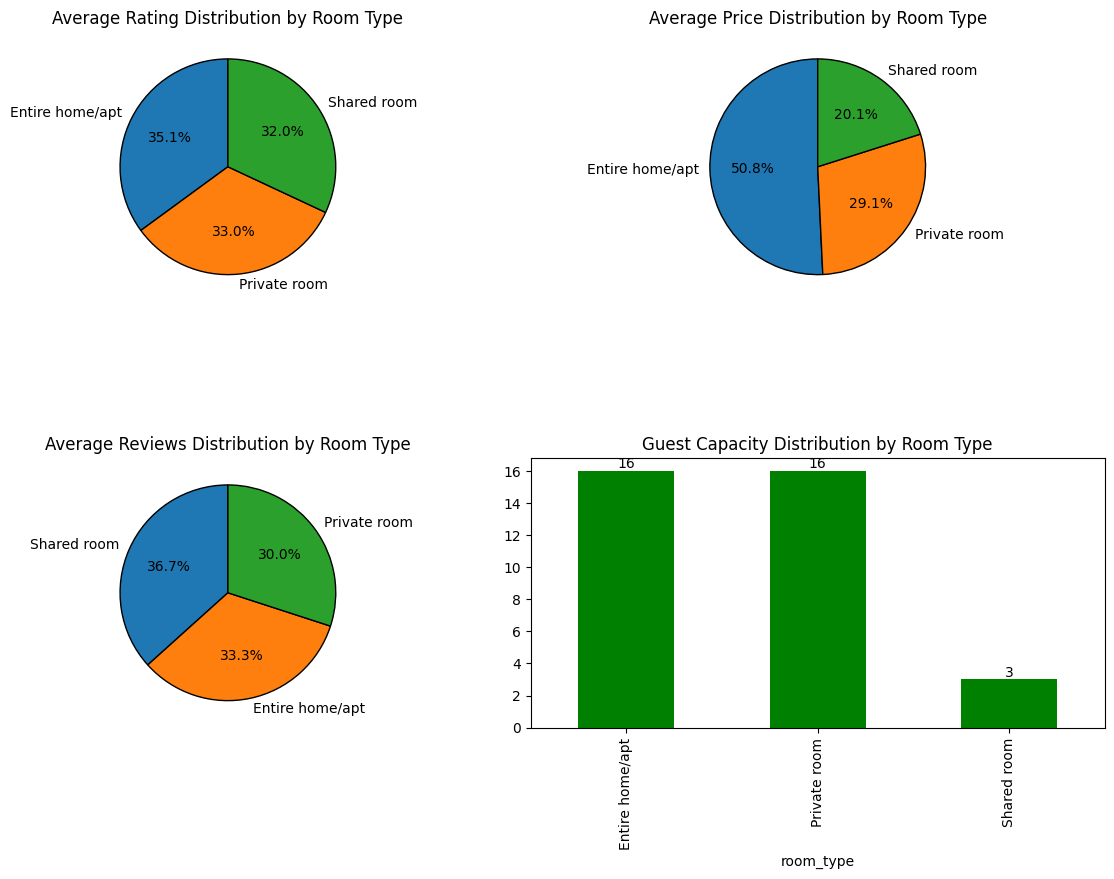

In [34]:
plt.figure(figsize=(12,16))

# I. Average Rating Distribution by Room Type
plt.subplot(4,2,1)
rating_data = france_df.groupby("room_type")["review_scores_rating"].mean().round(0).sort_values(ascending=False)
plt.pie(rating_data.values, labels=rating_data.index, autopct="%1.1f%%", startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Average Rating Distribution by Room Type")
plt.ylabel("")


# II. Average Price Distribution by Room Type
plt.subplot(4,2,2)
price_data = france_df.groupby("room_type")["price"].mean().round(0).sort_values(ascending=False)
plt.pie(price_data.values, labels=price_data.index, autopct="%1.1f%%", startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Average Price Distribution by Room Type")
plt.ylabel("")


# III. Average Reviews Distribution by Room Type
plt.subplot(4,2,3)
review_data = france_df.groupby("room_type")["number_of_reviews"].mean().round(0).sort_values(ascending=False)
plt.pie(review_data.values, labels=review_data.index, autopct="%1.1f%%", startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Average Reviews Distribution by Room Type")
plt.ylabel("")


# IV. Guest Capacity Distribution by Room Type
plt.subplot(4,2,4)
plot4 = france_df.groupby("room_type")["guests_included"].max().round(0).sort_values(ascending=False).plot(kind = "bar" , color = "green")
plot4.bar_label(plot4.containers[0])
plt.title("Guest Capacity Distribution by Room Type")
plt.ylabel("")


plt.tight_layout()
plt.show()


#    

# PROPERTIES AND AMENITIES ANALYSIS

## AMENITIES ANALYSIS

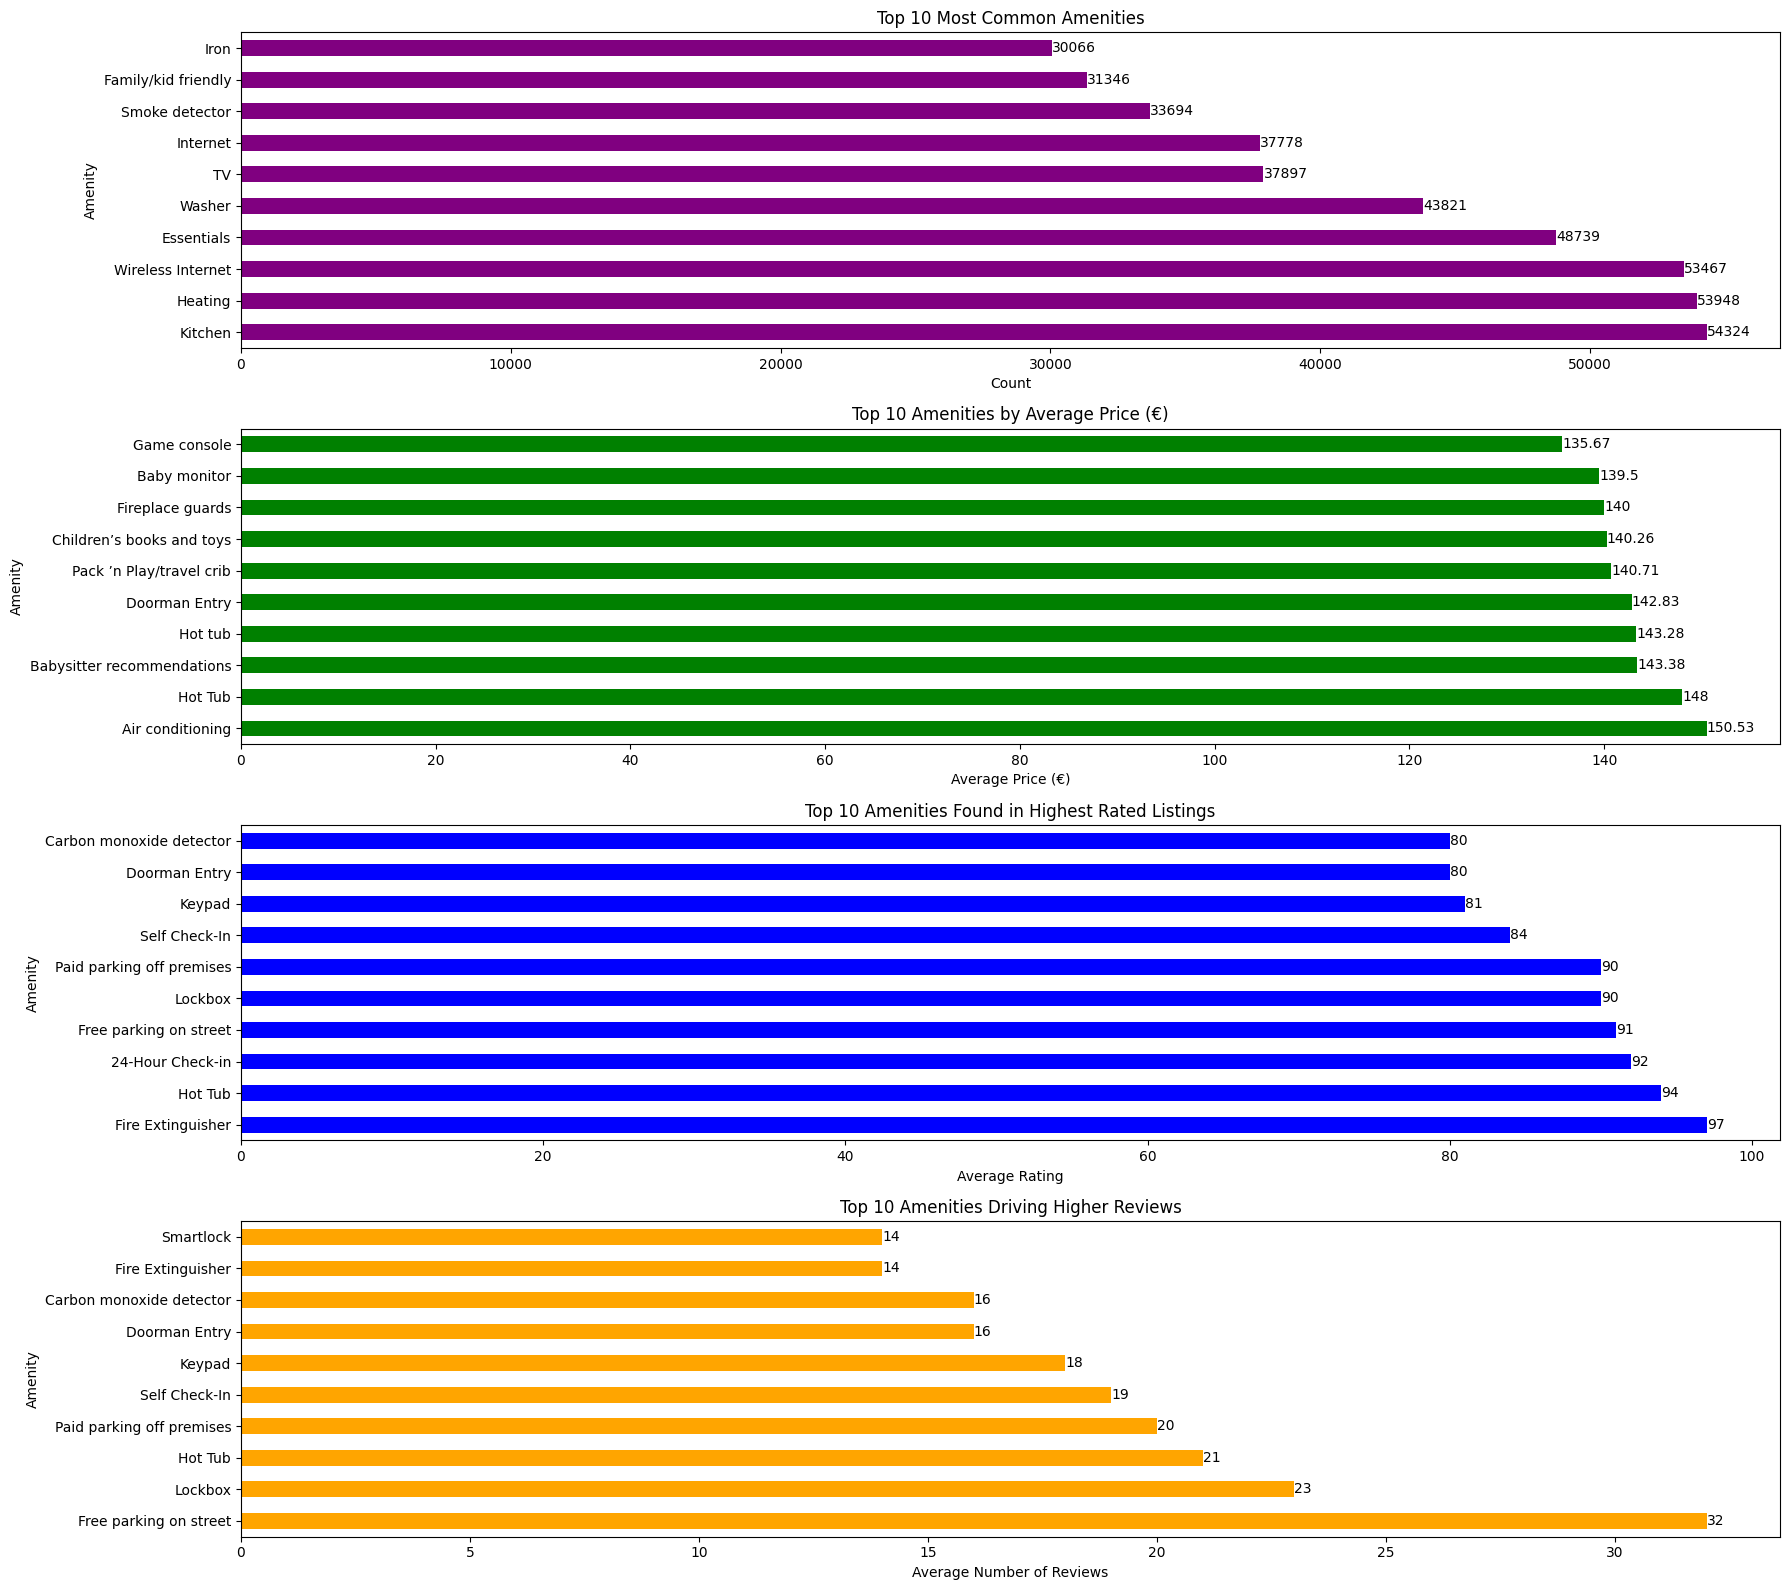

In [35]:
# PREPARE AMENITIES DATA
amenities_df = france_df.assign(amenity = france_df["amenities"].str.split(",")).explode("amenity")
amenities_df["amenity"] = amenities_df["amenity"].str.strip()
amenities_df = amenities_df[~amenities_df["amenity"].str.contains("translation", na=False)]

plt.figure(figsize=(18,16))

# I. Top 10 Most Common Amenities
plt.subplot(4,1,1)
plot1 = amenities_df["amenity"].value_counts().head(10).plot(kind="barh", color="purple")
plot1.bar_label(plot1.containers[0])
plt.title("Top 10 Most Common Amenities")
plt.xlabel("Count")
plt.ylabel("Amenity")


# II. Top 10 Amenities by Average Price
plt.subplot(4,1,2)
plot2 = amenities_df.groupby("amenity")["price"].mean().round(2).sort_values(ascending=False).head(10).plot(kind="barh", color="green")
plot2.bar_label(plot2.containers[0])
plt.title("Top 10 Amenities by Average Price (€)")
plt.xlabel("Average Price (€)")
plt.ylabel("Amenity")


# III. Top 10 Amenities for Highest Ratings
plt.subplot(4,1,3)
plot3 = amenities_df.groupby("amenity")["review_scores_rating"].mean().round(0).sort_values(ascending=False).head(10).plot(kind="barh", color="blue")
plot3.bar_label(plot3.containers[0])
plt.title("Top 10 Amenities Found in Highest Rated Listings")
plt.xlabel("Average Rating")
plt.ylabel("Amenity")


# IV. Top 10 Amenities Driving Maximum Reviews
plt.subplot(4,1,4)
plot4 = amenities_df.groupby("amenity")["number_of_reviews"].mean().round(0).sort_values(ascending=False).head(10).plot(kind="barh", color="orange")
plot4.bar_label(plot4.containers[0])
plt.title("Top 10 Amenities Driving Higher Reviews")
plt.xlabel("Average Number of Reviews")
plt.ylabel("Amenity")


plt.tight_layout()
plt.show()


## PROPERTIES ANALYSIS

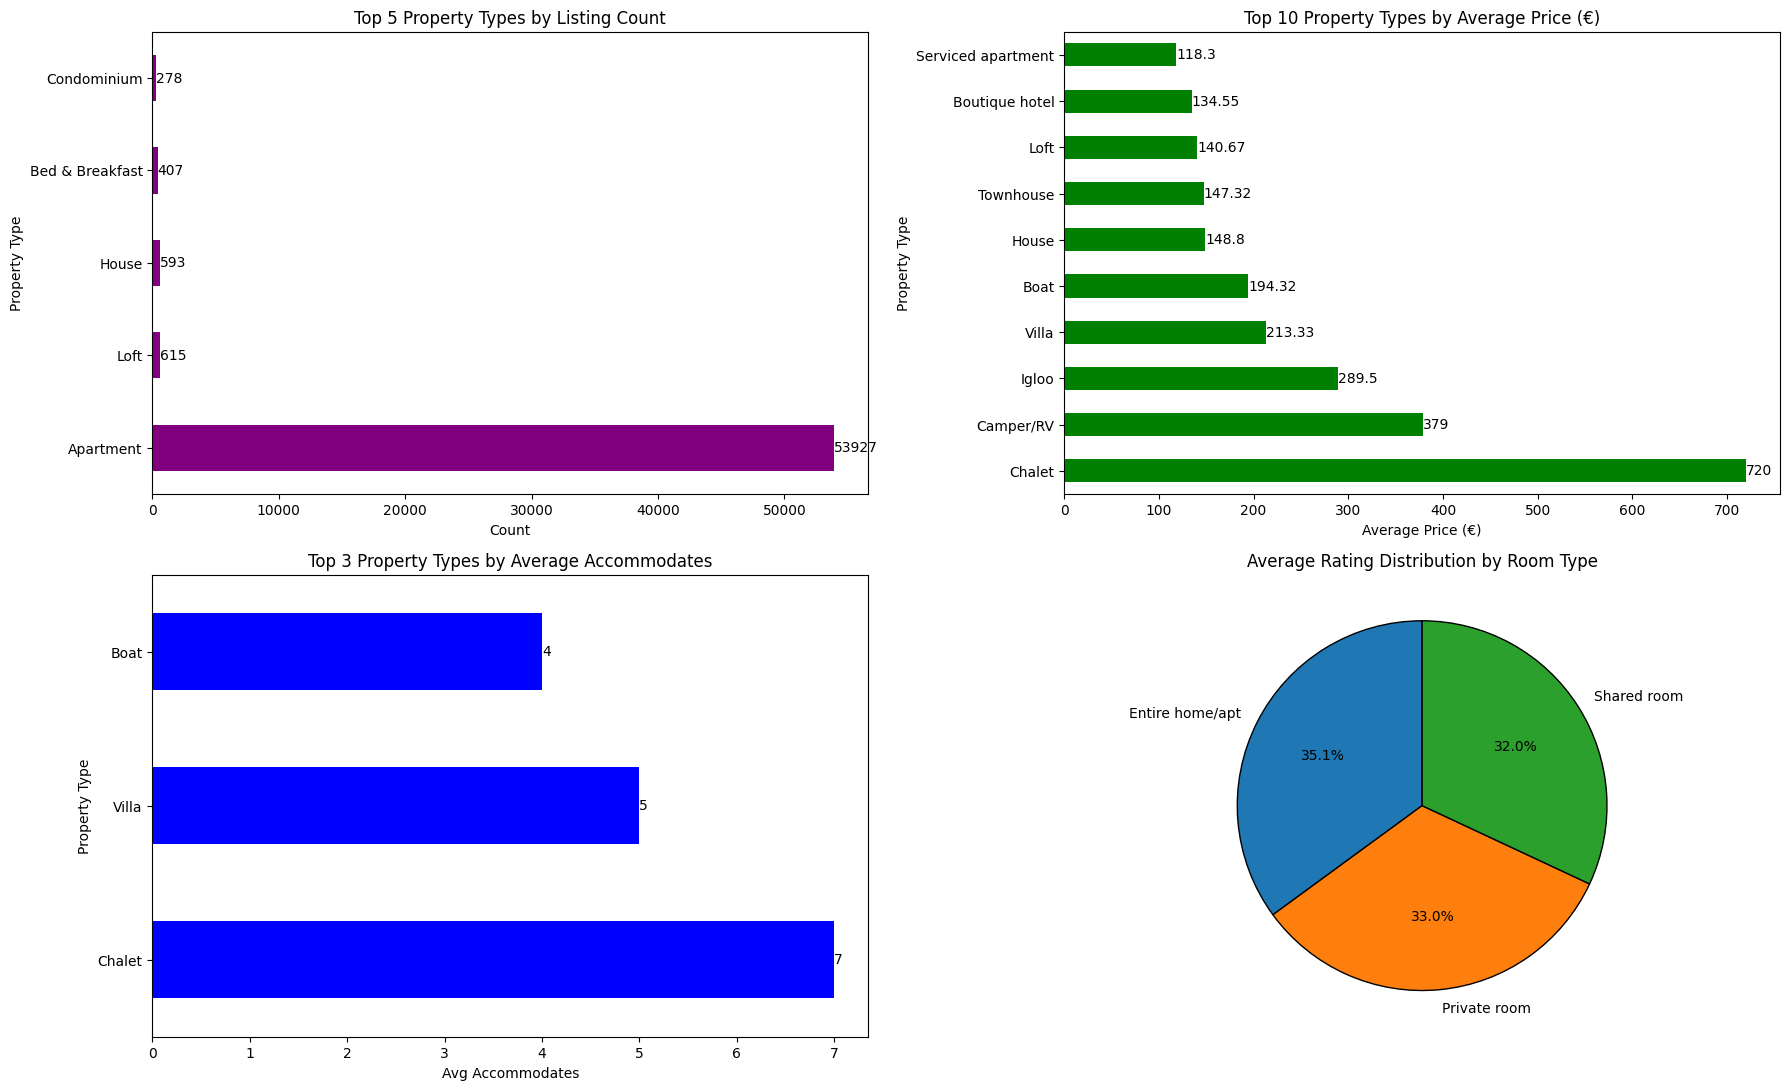

In [36]:
plt.figure(figsize=(18,16))

# I. Top 10 Property Types by Count
plt.subplot(3,2,1)
plot1 = france_df["property_type"].value_counts().head(5).plot(kind="barh", color="purple")
plot1.bar_label(plot1.containers[0])
plt.title("Top 5 Property Types by Listing Count")
plt.xlabel("Count")
plt.ylabel("Property Type")


# II. Average Price by Property Type (Top 10 Most Expensive)
plt.subplot(3,2,2)
plot2 = france_df.groupby("property_type")["price"].mean().round(2).sort_values(ascending=False).head(10).plot(kind="barh", color="green")
plot2.bar_label(plot2.containers[0])
plt.title("Top 10 Property Types by Average Price (€)")
plt.xlabel("Average Price (€)")
plt.ylabel("Property Type")


# III. Average Accommodates by Property Type
plt.subplot(3,2,3)
plot3 = france_df.groupby("property_type")["accommodates"].mean().round(0).sort_values(ascending=False).head(3).plot(kind="barh", color="blue")
plot3.bar_label(plot3.containers[0])
plt.title("Top 3 Property Types by Average Accommodates")
plt.xlabel("Avg Accommodates")
plt.ylabel("Property Type")


# IV. Ratings by Room Type (Customer Satisfaction)
plt.subplot(3,2,4)

# Prepare data
room_rating = france_df.groupby("room_type")["review_scores_rating"].mean().round(0)

# Create pie chart
plt.pie(room_rating.values, labels=room_rating.index, autopct="%1.1f%%", startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Average Rating Distribution by Room Type")
plt.ylabel("")  

plt.tight_layout()
plt.show()


# DEMANDS AND SEASONAL TRENDS

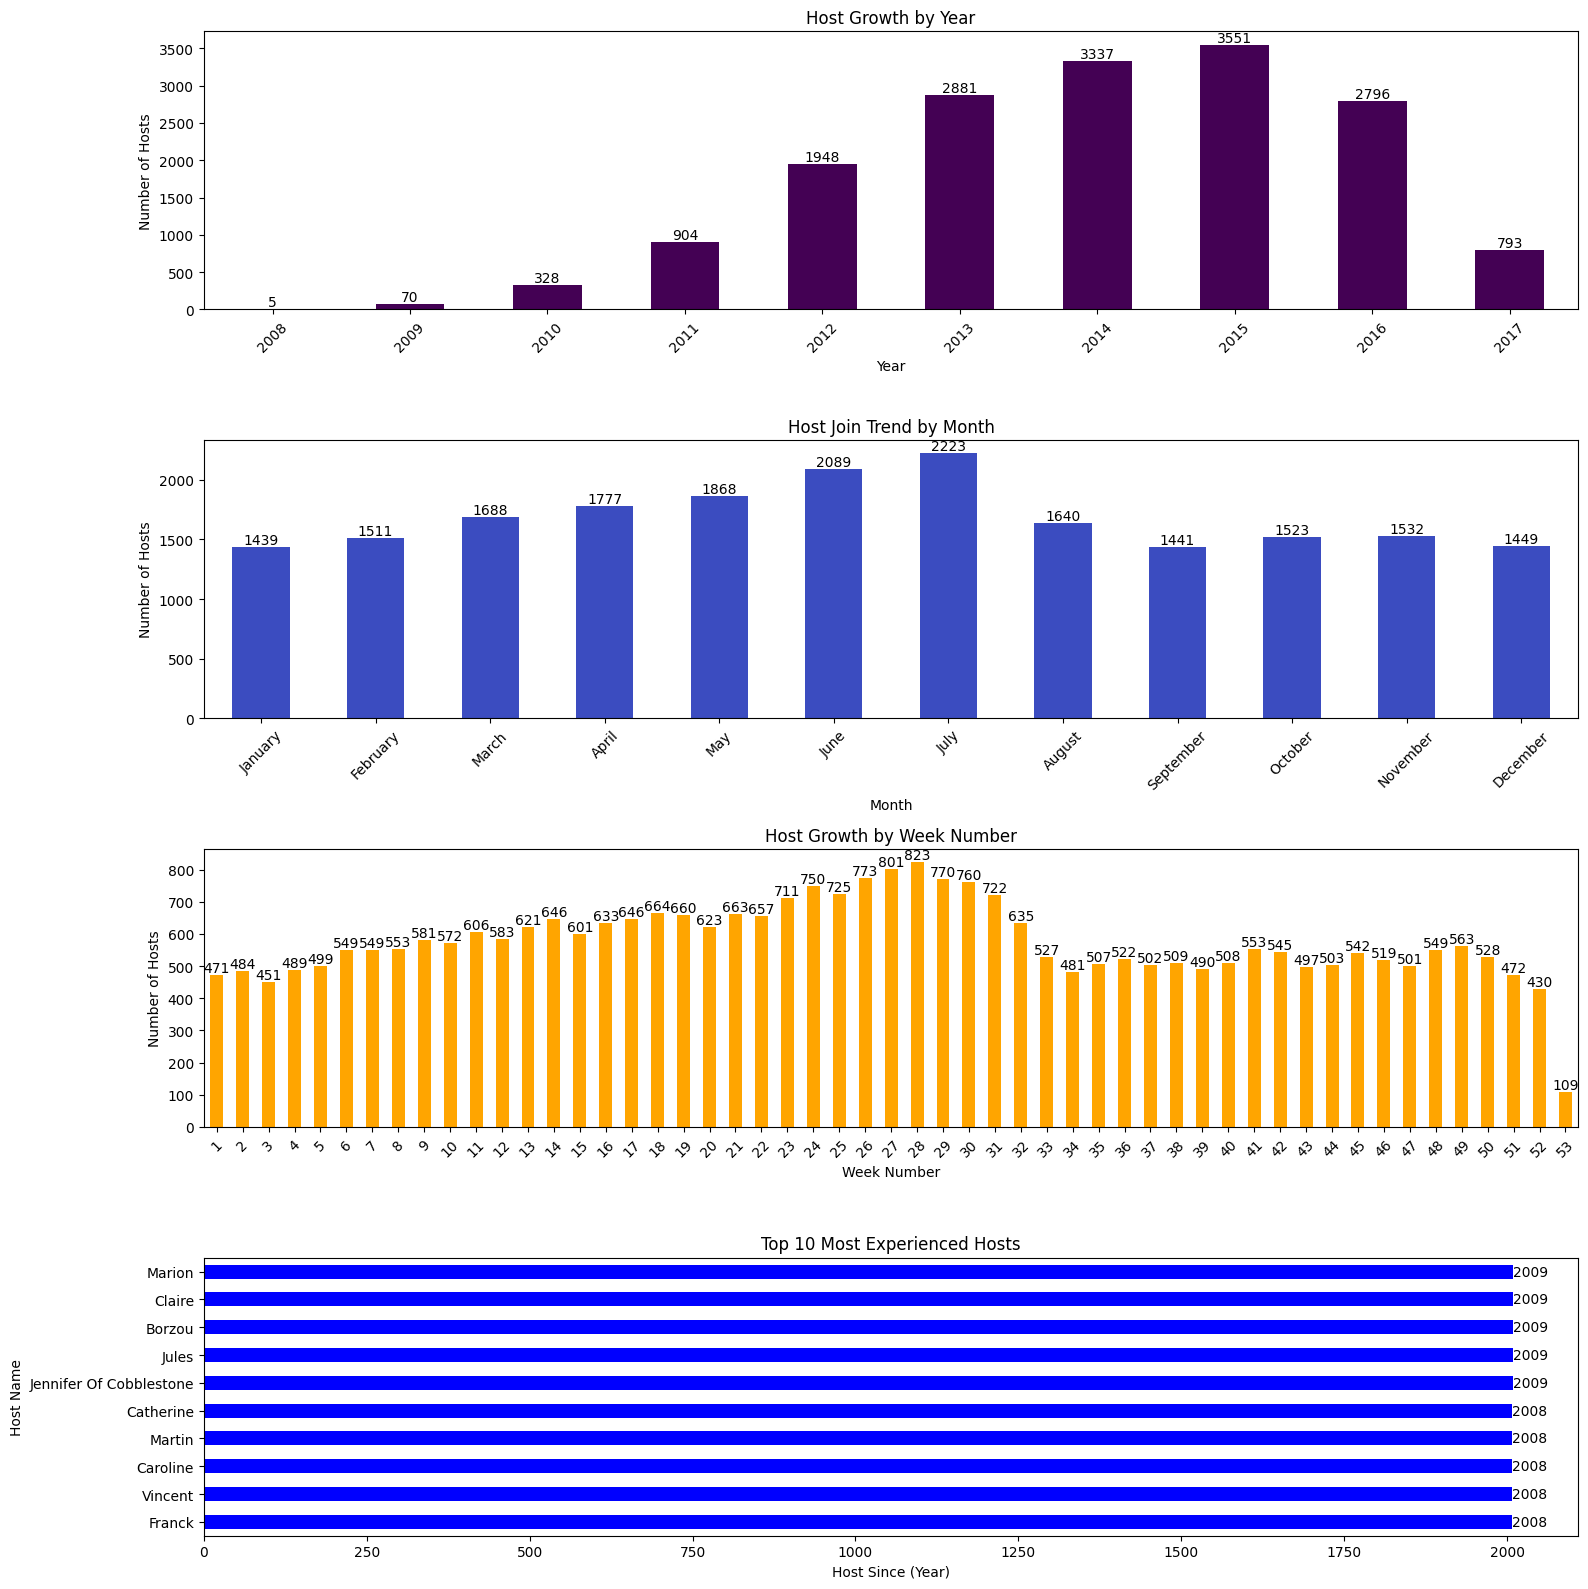

In [37]:
# Time columns
france_df["host_since"] = pd.to_datetime(france_df["host_since"], errors="coerce")
france_df["host_year"] = france_df["host_since"].dt.year
france_df["host_month"] = france_df["host_since"].dt.month_name()
france_df["host_week"] = france_df["host_since"].dt.isocalendar().week

plt.figure(figsize=(16,16))

# I. Host Growth by Year
plt.subplot(4,1,1)
plot1 = france_df.groupby("host_year")["host_name"].nunique().sort_index().plot(kind="bar",  colormap="viridis")
plot1.bar_label(plot1.containers[0])
plt.title("Host Growth by Year")
plt.xlabel("Year")
plt.ylabel("Number of Hosts")
plt.xticks(rotation=45)


# II. Host Join Trend by Month
plt.subplot(4,1,2)
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

plot2 = france_df.groupby("host_month")["host_name"].nunique().reindex(month_order).plot(kind="bar",  colormap="coolwarm")
plot2.bar_label(plot2.containers[0])
plt.title("Host Join Trend by Month")
plt.xlabel("Month")
plt.ylabel("Number of Hosts")
plt.xticks(rotation=45)


# III. Host Join Trends By Week Number
plt.subplot(4,1,3)
plot3 = france_df.groupby("host_week")["host_name"].nunique().sort_index().plot(kind="bar", color="orange")
plot3.bar_label(plot3.containers[0])
plt.title("Host Growth by Week Number")
plt.xlabel("Week Number")
plt.ylabel("Number of Hosts")
plt.xticks(rotation=45)


# IV. Top 10 Most Experienced Hosts
plt.subplot(4,1,4)
oldest = france_df.groupby("host_name")["host_since"].min().sort_values().head(10)
oldest_years = oldest.dt.year

plot4 = oldest_years.plot(kind="barh", color="blue")
plot4.bar_label(plot4.containers[0])
plt.title("Top 10 Most Experienced Hosts")
plt.xlabel("Host Since (Year)")
plt.ylabel("Host Name")

plt.tight_layout()
plt.show()



In [38]:
france_df.host_name.nunique()

9661

# CANCELLATION AND SECURITY POLICIES

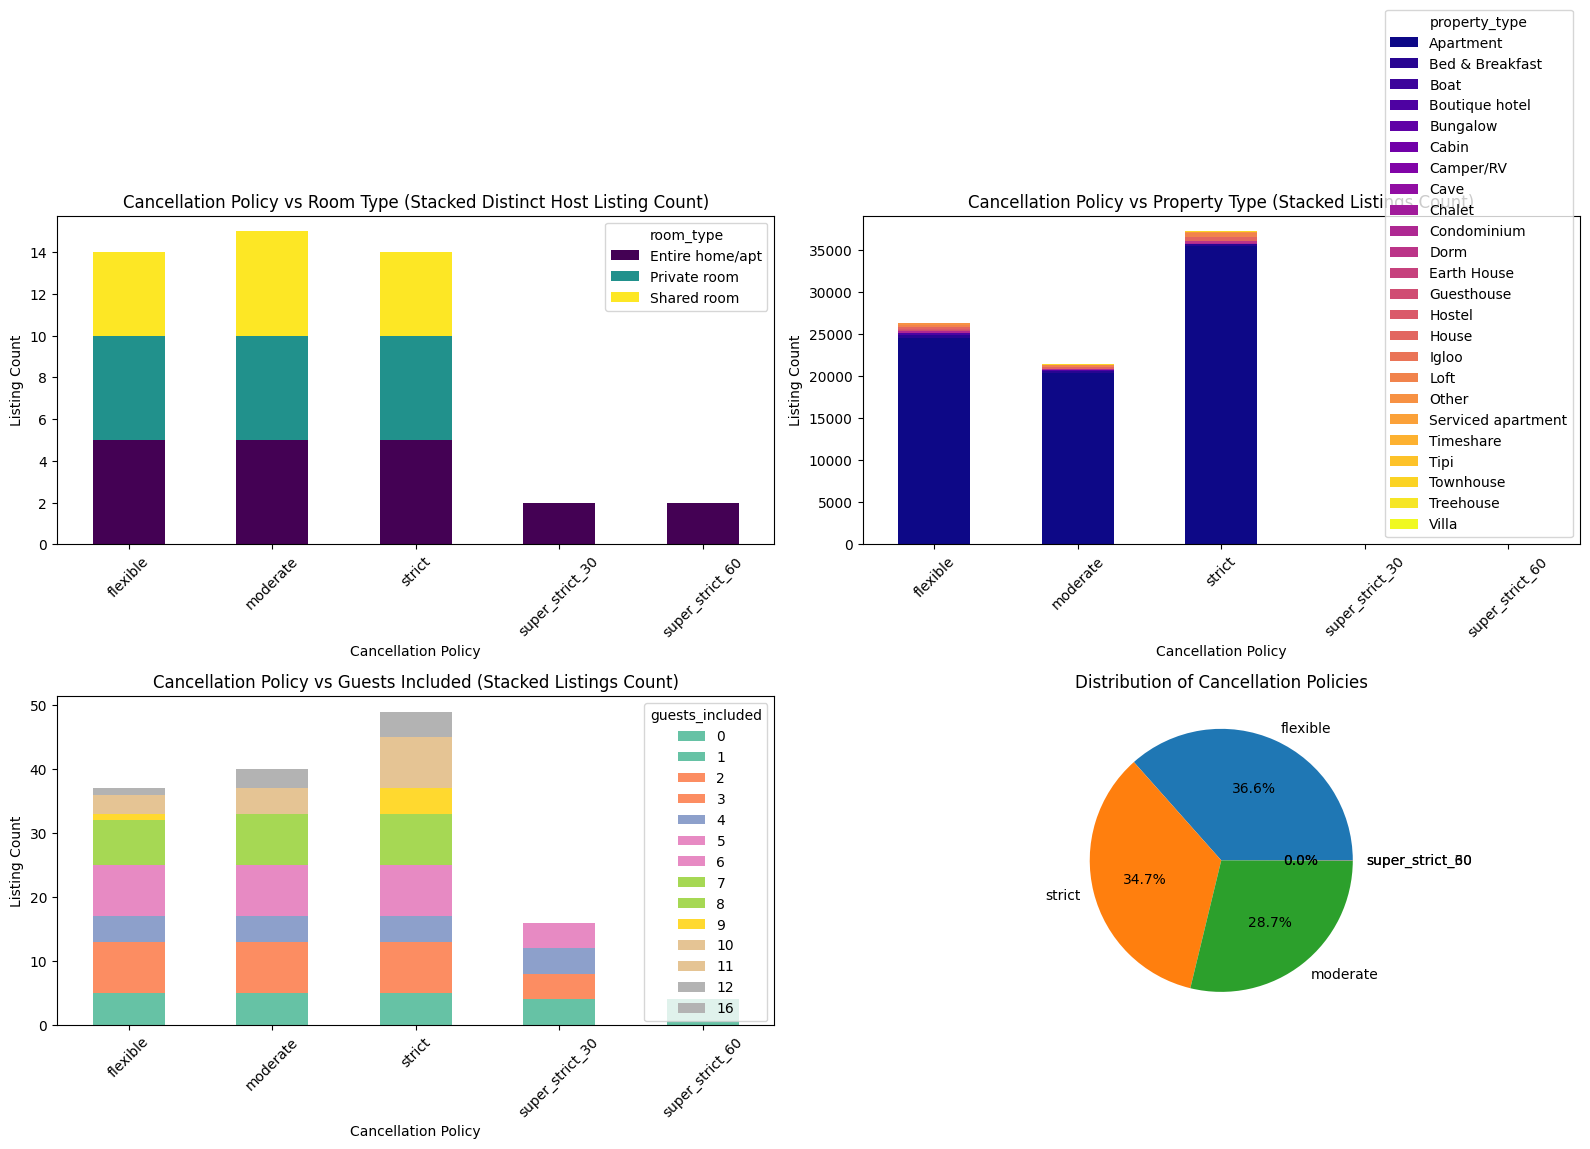

In [39]:
plt.figure(figsize=(16,20))

# I. Cancellation Policy vs Room Type (Stacked)
plt.subplot(4,2,1)
plot1 = france_df.groupby(["cancellation_policy", "room_type"])["host_total_listings_count"].nunique().unstack().plot(kind="bar", stacked=True, ax=plt.gca(), colormap="viridis")
plt.title("Cancellation Policy vs Room Type (Stacked Distinct Host Listing Count)")
plt.xlabel("Cancellation Policy")
plt.ylabel("Listing Count")
plt.xticks(rotation=45)

# II. Cancellation Policy vs Property Type (Stacked)
plt.subplot(4,2,2)
plot2 = france_df.groupby(["cancellation_policy", "property_type"])["host_total_listings_count"].sum().unstack().head(5).plot(kind="bar", stacked=True, ax=plt.gca(), colormap="plasma")
plt.title("Cancellation Policy vs Property Type (Stacked Listings Count)")
plt.xlabel("Cancellation Policy")
plt.ylabel("Listing Count")
plt.xticks(rotation=45)


# III. Cancellation Policy vs Guests Included (Stacked)
plt.subplot(4,2,3)
plot3 = france_df.groupby(["cancellation_policy", "guests_included"])["host_total_listings_count"].max().unstack().plot(kind="bar", stacked=True, ax=plt.gca(), colormap="Set2")
plt.title("Cancellation Policy vs Guests Included (Stacked Listings Count)")
plt.xlabel("Cancellation Policy")
plt.ylabel("Listing Count")
plt.xticks(rotation=45)


# IV. Distribution of Cancellation Policies (Pie Chart)
plt.subplot(4,2,4)
cancel_data = france_df["cancellation_policy"].value_counts()
plt.pie(cancel_data.values, labels=cancel_data.index, autopct="%1.1f%%")
plt.title("Distribution of Cancellation Policies")
plt.ylabel("")

plt.tight_layout()
plt.show()


# MARKET COMPETITIVENESS

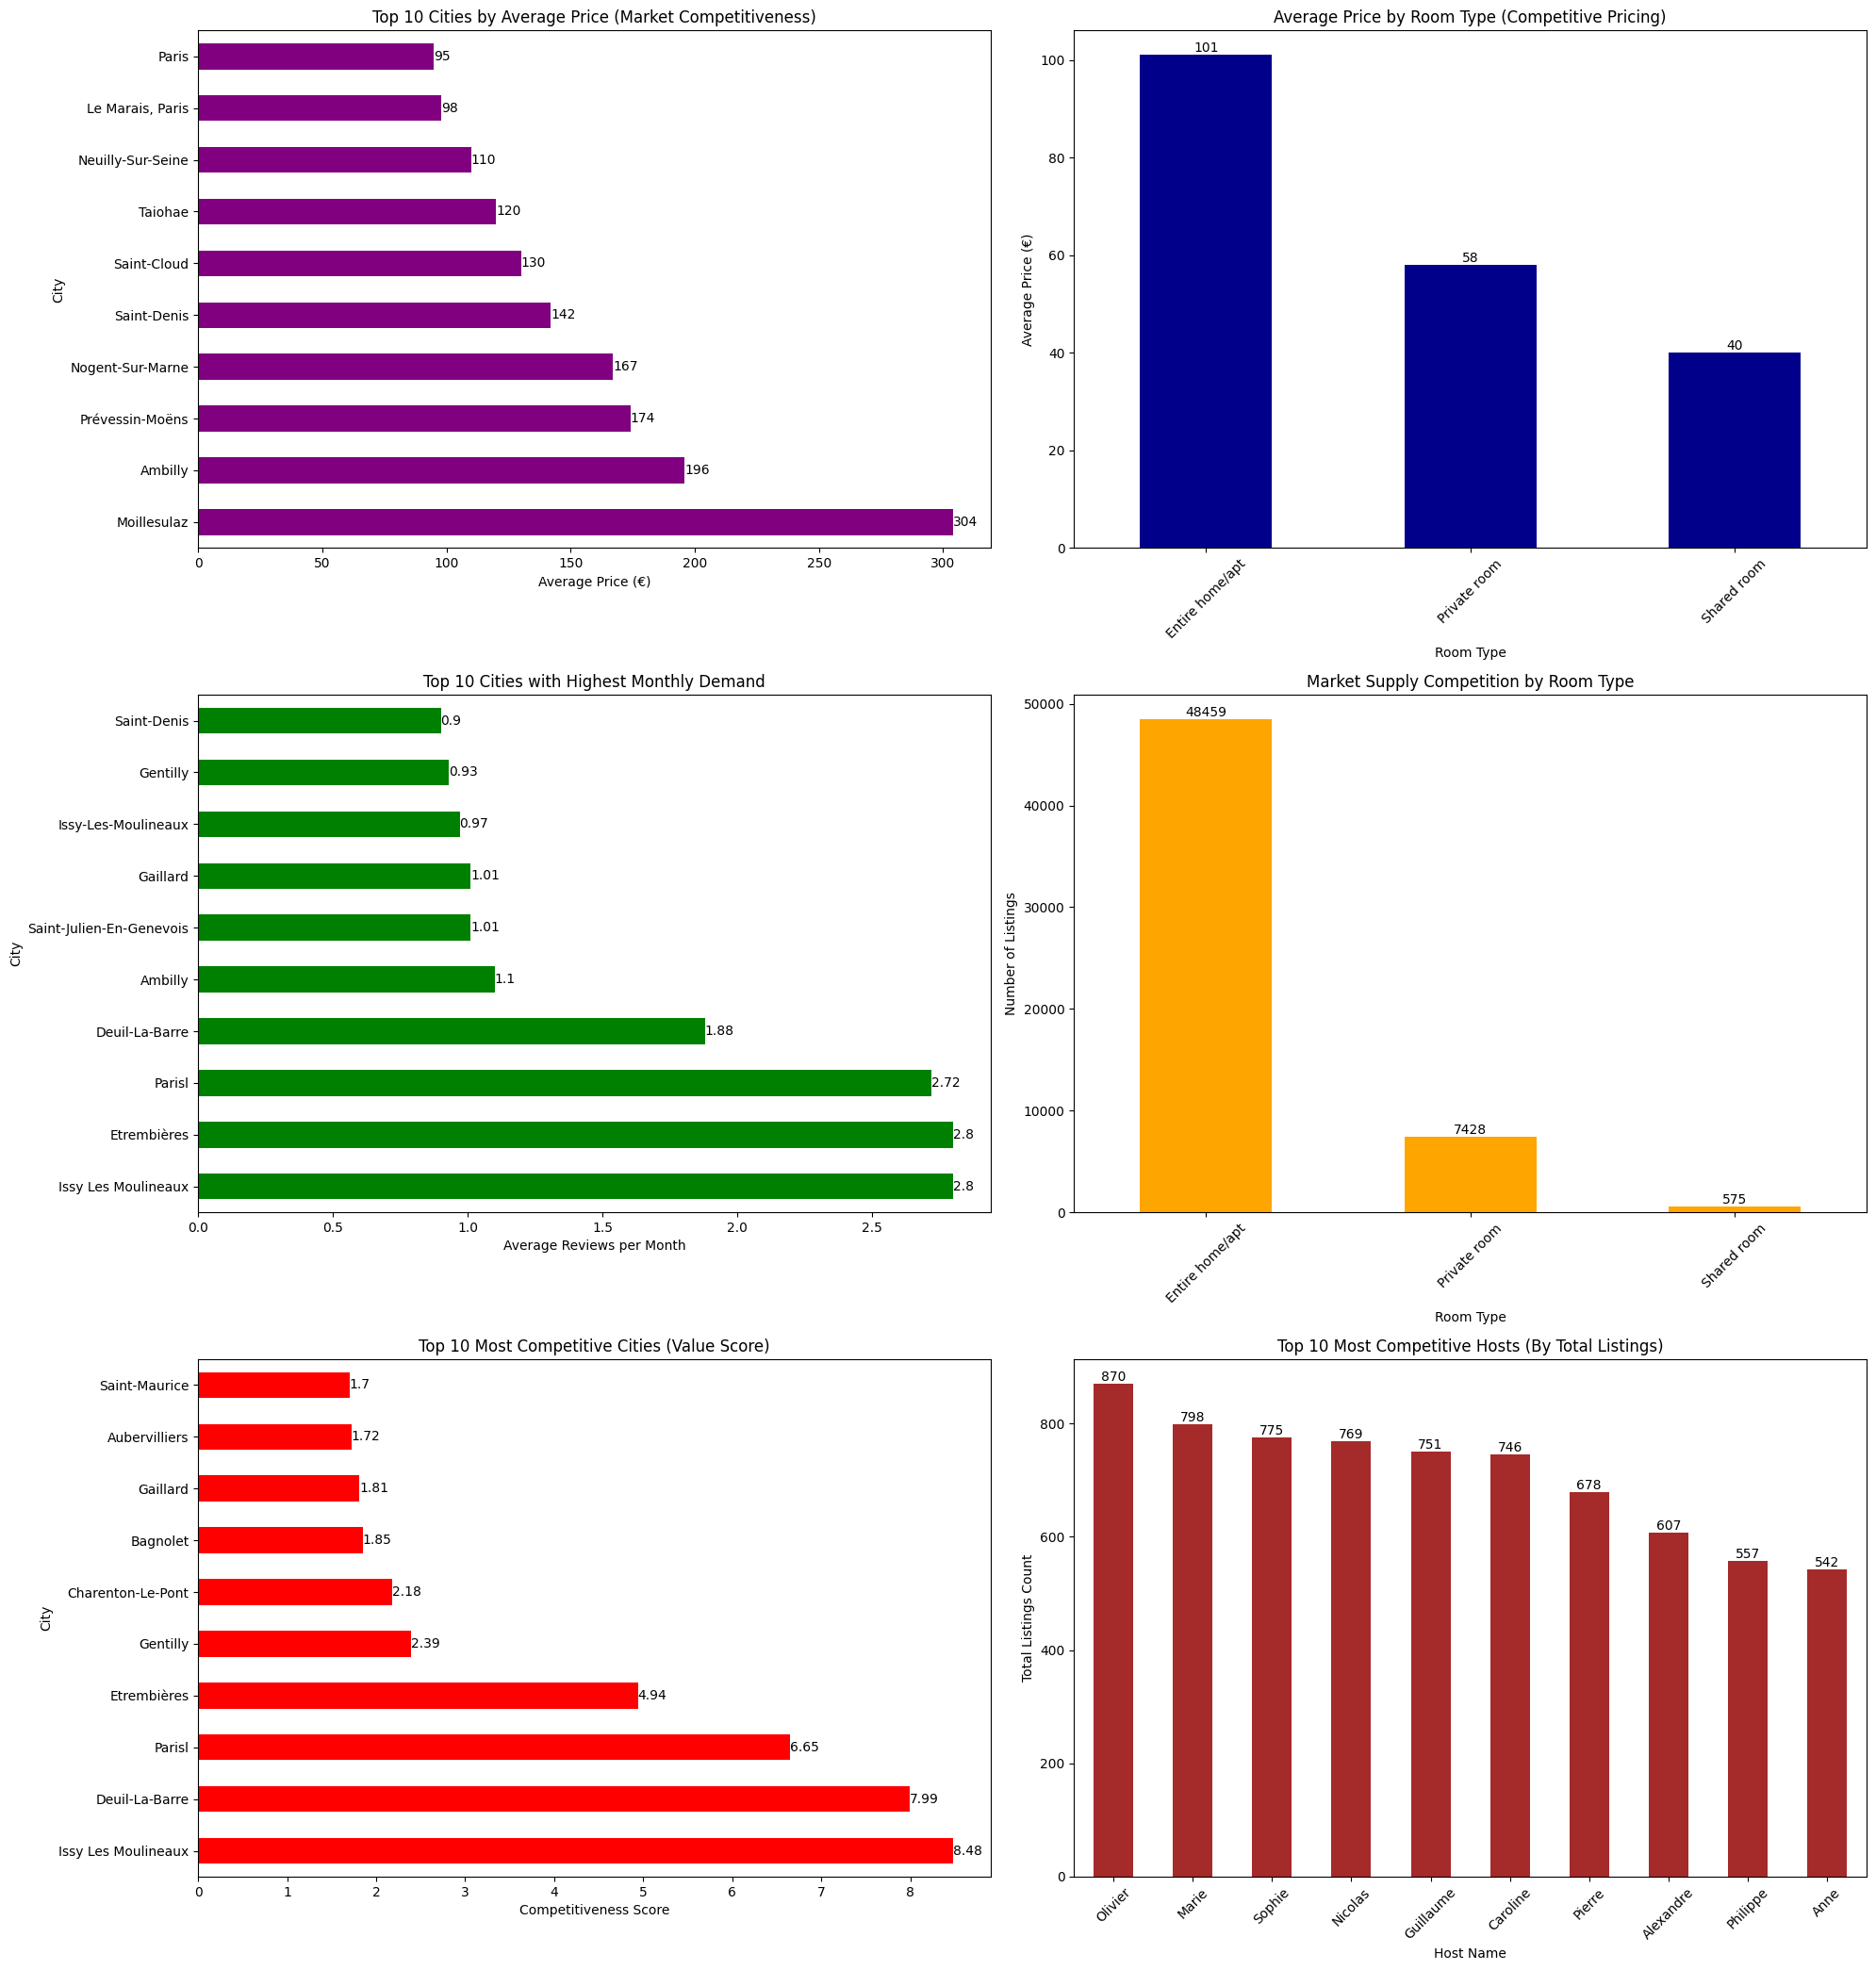

In [40]:
plt.figure(figsize=(20,21))

# I. Average Price by City (Top 10 Competitive Cities)
plt.subplot(3,2,1)
plot1 = france_df.groupby("city")["price"].mean().round(0).sort_values(ascending=False).head(10).plot(kind="barh", color="purple")
plot1.bar_label(plot1.containers[0])
plt.title("Top 10 Cities by Average Price (Market Competitiveness)")
plt.xlabel("Average Price (€)")
plt.ylabel("City")


# II. Average Price by Room Type (Price Competitiveness)
plt.subplot(3,2,2)
plot2 = france_df.groupby("room_type")["price"].mean().round(0).sort_values(ascending=False).plot(kind="bar", color="darkblue")
plot2.bar_label(plot2.containers[0])
plt.title("Average Price by Room Type (Competitive Pricing)")
plt.xlabel("Room Type")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=45)


# III. Demand: Cities with Highest Reviews per Month
plt.subplot(3,2,3)
plot3 = france_df.groupby("city")["reviews_per_month"].mean().round(2).sort_values(ascending=False).head(10).plot(kind="barh", color="green")
plot3.bar_label(plot3.containers[0])
plt.title("Top 10 Cities with Highest Monthly Demand")
plt.xlabel("Average Reviews per Month")
plt.ylabel("City")


# IV. Supply Competition: Number of Listings by Room Type
plt.subplot(3,2,4)
plot4 = france_df.groupby("room_type")["id"].count().sort_values(ascending=False).plot(kind="bar", color="orange")
plot4.bar_label(plot4.containers[0])
plt.title("Market Supply Competition by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)


# V. Competitiveness Score: (Rating * Reviews_per_month) / Price
france_df["competitiveness_score"] = (france_df["review_scores_rating"] * france_df["reviews_per_month"]) / france_df["price"]

plt.subplot(3,2,5)
plot5 = france_df.groupby("city")["competitiveness_score"].mean().round(2).sort_values(ascending=False).head(10).plot(kind="barh", color="red")
plot5.bar_label(plot5.containers[0])
plt.title("Top 10 Most Competitive Cities (Value Score)")
plt.xlabel("Competitiveness Score")
plt.ylabel("City")


# VI. Host Competitiveness: Large Hosts (Top 10 by Total Listings)
plt.subplot(3,2,6)
plot6 = france_df.groupby("host_name")["host_total_listings_count"].sum().sort_values(ascending=False).head(10).plot(kind="bar", color="brown")
plot6.bar_label(plot6.containers[0])
plt.title("Top 10 Most Competitive Hosts (By Total Listings)")
plt.xlabel("Host Name")
plt.ylabel("Total Listings Count")
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()
